In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/synthetic_covid_impact_on_work.csv')
df.head()

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                     1               1              6.392394   
1                     1               1              9.171984   
2                     1               0             10.612561   
3                     1               1              5.546169   
4                     0               1             11.424615   

   Meetings_Per_Day  Productivity_Change Stress_Level  Health_Issue  \
0          2.684594                    1          Low             0   
1          3.339225                    1          Low             0   
2          2.218333                    0       Medium             0   
3          5.150566                    0       Medium             0   
4          3.121126                    1       Medium             0   

   Job_Security  Childcare_Responsibilities  Commuting_Changes  \
0             0                           1                  1   
1             1                           0                  1   
2             0                           0                  0   
3             0                           0                  1   
4             1                           1                  1   

   Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
0                      1               0                              1   
1                      1               0                              1   
2                      0               0                              0   
3                      0               0                              0   
4                      0               1                              1   

      Sector  Affected_by_Covid  
0     Retail                  1  
1         IT                  1  
2     Retail                  1  
3  Education                  1  
4  Education                  1

In [ ]:
df.sample(5)

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
9539                     1               1              8.996529   
9115                     1               1              8.139067   
7929                     0               1              6.555492   
1155                     1               1              7.217644   
849                      1               0              8.413765   

      Meetings_Per_Day  Productivity_Change Stress_Level  Health_Issue  \
9539          4.015013                    1         High             0   
9115          4.782726                    1       Medium             0   
7929          5.619427                    0         High             0   
1155          2.783589                    1       Medium             1   
849           3.990383                    1       Medium             0   

      Job_Security  Childcare_Responsibilities  Commuting_Changes  \
9539             1                           0                  1   
9115             0                           0                  0   
7929             1                           0                  1   
1155             1                           1                  1   
849              0                           0                  0   

      Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
9539                      1               0                              0   
9115                      1               0                              1   
7929                      1               0                              0   
1155                      1               1                              1   
849                       1               0                              1   

          Sector  Affected_by_Covid  
9539          IT                  1  
9115  Healthcare                  1  
7929   Education                  1  
1155   Education                  1  
849           IT                  1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

In [ ]:
df.shape

(10000, 15)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Increased_Work_Hours             0
Work_From_Home                   0
Hours_Worked_Per_Day             0
Meetings_Per_Day                 0
Productivity_Change              0
Stress_Level                     0
Health_Issue                     0
Job_Security                     0
Childcare_Responsibilities       0
Commuting_Changes                0
Technology_Adaptation            0
Salary_Changes                   0
Team_Collaboration_Challenges    0
Sector                           0
Affected_by_Covid                0
dtype: int64

The dataset has been thoroughly examined, and it has been confirmed that there are no missing or null values present in any of the columns or rows. This indicates that the dataset is complete and does not require additional preprocessing to handle missing data, such as imputing values or removing rows with null entries.

In [ ]:
df['Stress_Level'].value_counts()

Stress_Level
Medium    4956
High      3036
Low       2008
Name: count, dtype: int64

In [ ]:
for col in df.columns:
  print(col,df[col].unique())
  print('='*200)

Increased_Work_Hours [1 0]
Work_From_Home [1 0]
Hours_Worked_Per_Day [ 6.39239364  9.17198354 10.61256095 ... 10.17621059 11.90397286
  8.44328419]
Meetings_Per_Day [2.6845944  3.33922458 2.21833271 ... 1.03968864 3.75672496 4.22579357]
Productivity_Change [1 0]
Stress_Level ['Low' 'Medium' 'High']
Health_Issue [0 1]
Job_Security [0 1]
Childcare_Responsibilities [1 0]
Commuting_Changes [1 0]
Technology_Adaptation [1 0]
Salary_Changes [0 1]
Team_Collaboration_Challenges [1 0]
Sector ['Retail' 'IT' 'Education' 'Healthcare']
Affected_by_Covid [1 0]


In [ ]:
for col in df.columns:
  print(col,df[col].value_counts())
  print('='*200)

Increased_Work_Hours Increased_Work_Hours
1    6769
0    3231
Name: count, dtype: int64
Work_From_Home Work_From_Home
1    8033
0    1967
Name: count, dtype: int64
Hours_Worked_Per_Day Hours_Worked_Per_Day
6.392394     1
5.414253     1
8.503570     1
8.844495     1
7.867721     1
            ..
8.484488     1
4.224276     1
9.405006     1
11.909325    1
8.443284     1
Name: count, Length: 10000, dtype: int64
Meetings_Per_Day Meetings_Per_Day
2.684594    1
3.907831    1
4.873413    1
3.271396    1
2.888131    1
           ..
2.562600    1
1.653880    1
3.995436    1
6.860897    1
4.225794    1
Name: count, Length: 10000, dtype: int64
Productivity_Change Productivity_Change
1    5022
0    4978
Name: count, dtype: int64
Stress_Level Stress_Level
Medium    4956
High      3036
Low       2008
Name: count, dtype: int64
Health_Issue Health_Issue
0    6989
1    3011
Name: count, dtype: int64
Job_Security Job_Security
0    5951
1    4049
Name: count, dtype: int64
Childcare_Responsibilities Child

In [ ]:
import plotly.graph_objects as go
for col in df.columns:
  fig=go.Figure()
  fig.add_trace(go.Histogram(x=df[col],name=col))
  fig.update_layout(title_text=f'Distribution of {col}',xaxis_title=col,yaxis_title='Count')
  fig.show()

<ipython-input-12-8b45fbd63694>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




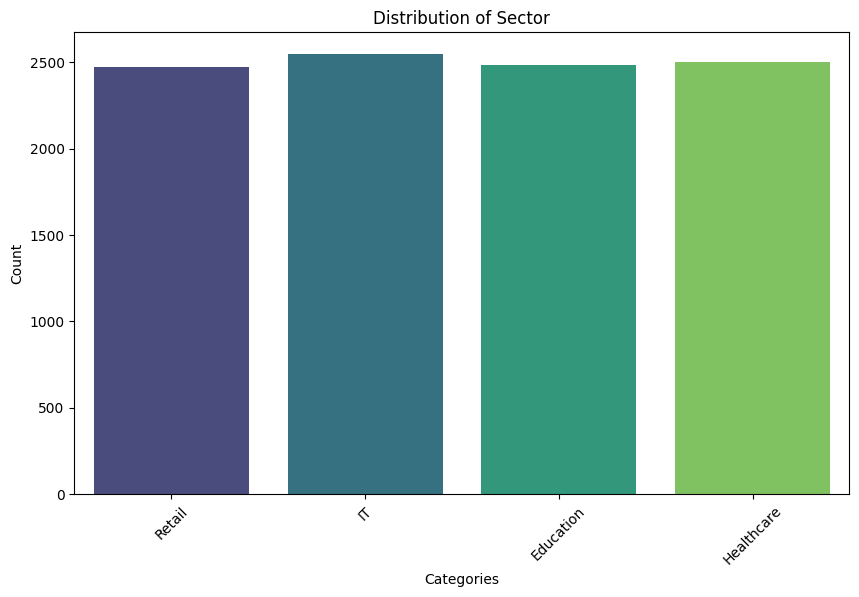

<ipython-input-12-8b45fbd63694>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




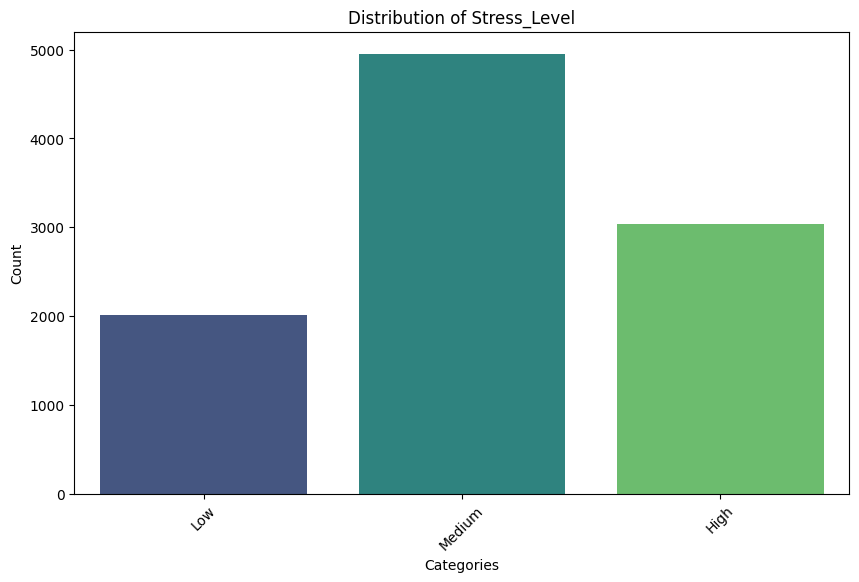

In [ ]:
import seaborn as sns
data=df.copy()

def plot_cat(col,title):
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df, palette='viridis')
  plt.title(title)
  plt.xlabel("Categories")
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

plot_cat("Sector","Distribution of Sector")
plot_cat("Stress_Level","Distribution of Stress_Level")

In [ ]:
df['Sector'].value_counts()

Sector
IT            2546
Healthcare    2498
Education     2484
Retail        2472
Name: count, dtype: int64

In [ ]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level'] = df['Stress_Level'].map(mapping)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
enc_arr = enc.fit_transform(df[['Sector']])
enc_df = pd.DataFrame(enc_arr, columns=enc.get_feature_names_out(['Sector']))

df = pd.concat([df, enc_df], axis=1)


In [ ]:
df.sample(5)

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
2627                     1               1              9.770941   
2899                     0               0              9.273084   
8563                     1               1              9.858958   
7525                     1               1              8.730581   
4356                     0               1             10.840802   

      Meetings_Per_Day  Productivity_Change  Stress_Level  Health_Issue  \
2627          3.371110                    0             1             0   
2899          3.249838                    0             3             0   
8563          2.505372                    1             2             0   
7525          5.269620                    1             2             0   
4356          3.054708                    0             3             0   

      Job_Security  Childcare_Responsibilities  Commuting_Changes  \
2627             0                           1                  0   
2899             0                           0                  0   
8563             1                           1                  0   
7525             0                           1                  1   
4356             0                           1                  1   

      Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
2627                      1               0                              1   
2899                      1               0                              1   
8563                      1               0                              1   
7525                      0               0                              1   
4356                      1               0                              0   

          Sector  Affected_by_Covid  Sector_Education  Sector_Healthcare  \
2627  Healthcare                  1               0.0                1.0   
2899   Education                  1               1.0                0.0   
8563      Retail                  1               0.0                0.0   
7525  Healthcare                  1               0.0                1.0   
4356      Retail                  1               0.0                0.0   

      Sector_IT  Sector_Retail  
2627        0.0            0.0  
2899        0.0            0.0  
8563        0.0            1.0  
7525        0.0            0.0  
4356        0.0            1.0

In [ ]:
import pickle

with open('enc.pkl', 'wb') as file:
    pickle.dump(enc, file)


## Distribution of Data

In [ ]:
df.describe().T

count      mean       std       min  \
Increased_Work_Hours           10000.0  0.676900  0.467684  0.000000   
Work_From_Home                 10000.0  0.803300  0.397523  0.000000   
Hours_Worked_Per_Day           10000.0  8.006538  1.978468  0.287249   
Meetings_Per_Day               10000.0  3.976717  1.521594 -2.698406   
Productivity_Change            10000.0  0.502200  0.500020  0.000000   
Stress_Level                   10000.0  2.102800  0.702767  1.000000   
Health_Issue                   10000.0  0.301100  0.458759  0.000000   
Job_Security                   10000.0  0.404900  0.490897  0.000000   
Childcare_Responsibilities     10000.0  0.396700  0.489237  0.000000   
Commuting_Changes              10000.0  0.502200  0.500020  0.000000   
Technology_Adaptation          10000.0  0.605100  0.488854  0.000000   
Salary_Changes                 10000.0  0.194800  0.396066  0.000000   
Team_Collaboration_Challenges  10000.0  0.700600  0.458018  0.000000   
Affected_by_Covid              10000.0  0.999800  0.014141  0.000000   
Sector_Education               10000.0  0.248400  0.432107  0.000000   
Sector_Healthcare              10000.0  0.249800  0.432919  0.000000   
Sector_IT                      10000.0  0.254600  0.435658  0.000000   
Sector_Retail                  10000.0  0.247200  0.431406  0.000000   

                                    25%       50%       75%        max  
Increased_Work_Hours           0.000000  1.000000  1.000000   1.000000  
Work_From_Home                 1.000000  1.000000  1.000000   1.000000  
Hours_Worked_Per_Day           6.648484  8.010864  9.348860  16.958168  
Meetings_Per_Day               2.924896  3.981344  5.024619   9.591750  
Productivity_Change            0.000000  1.000000  1.000000   1.000000  
Stress_Level                   2.000000  2.000000  3.000000   3.000000  
Health_Issue                   0.000000  0.000000  1.000000   1.000000  
Job_Security                   0.000000  0.000000  1.000000   1.000000  
Childcare_Responsibilities     0.000000  0.000000  1.000000   1.000000  
Commuting_Changes              0.000000  1.000000  1.000000   1.000000  
Technology_Adaptation          0.000000  1.000000  1.000000   1.000000  
Salary_Changes                 0.000000  0.000000  0.000000   1.000000  
Team_Collaboration_Challenges  0.000000  1.000000  1.000000   1.000000  
Affected_by_Covid              1.000000  1.000000  1.000000   1.000000  
Sector_Education               0.000000  0.000000  0.000000   1.000000  
Sector_Healthcare              0.000000  0.000000  0.000000   1.000000  
Sector_IT                      0.000000  0.000000  1.000000   1.000000  
Sector_Retail                  0.000000  0.000000  0.000000   1.000000

Increased Work Hours and Work From Home:

A large proportion of the population reported Increased_Work_Hours (mean = 0.68) and Work_From_Home (mean = 0.80), reflecting common trends during the pandemic or other remote work shifts. These variables have low variability, indicating a consistent pattern across respondents.
Hours Worked Per Day:

The average Hours_Worked_Per_Day is 8.01, with a wide range (0.29 to 16.96 hours). This suggests a significant disparity in daily working hours, likely influenced by remote work dynamics, job roles, or individual work-life balance.
Productivity Change:

The mean Productivity_Change is 0.50, with many respondents either reporting no change or a positive change in productivity, possibly due to work from home or other adjustments. The data shows a balanced split between improvement and no change.
Stress Level:

With a mean Stress_Level of 2.10, most individuals reported moderate to high stress levels (2 or 3). This indicates that stress, possibly due to work and life adjustments, was a prevalent concern across the dataset.

In [ ]:
data = df.copy()
df=df.drop('Sector', axis=1)

In [ ]:
desc = df.describe().T

styled_desc = desc.style.background_gradient(cmap="coolwarm", subset=pd.IndexSlice[:, :]) \
                                      .format("{:.2f}") \
                                      .set_caption("Descriptive Statistics with Color Gradients")
styled_desc


## EDA and Graphical Representations

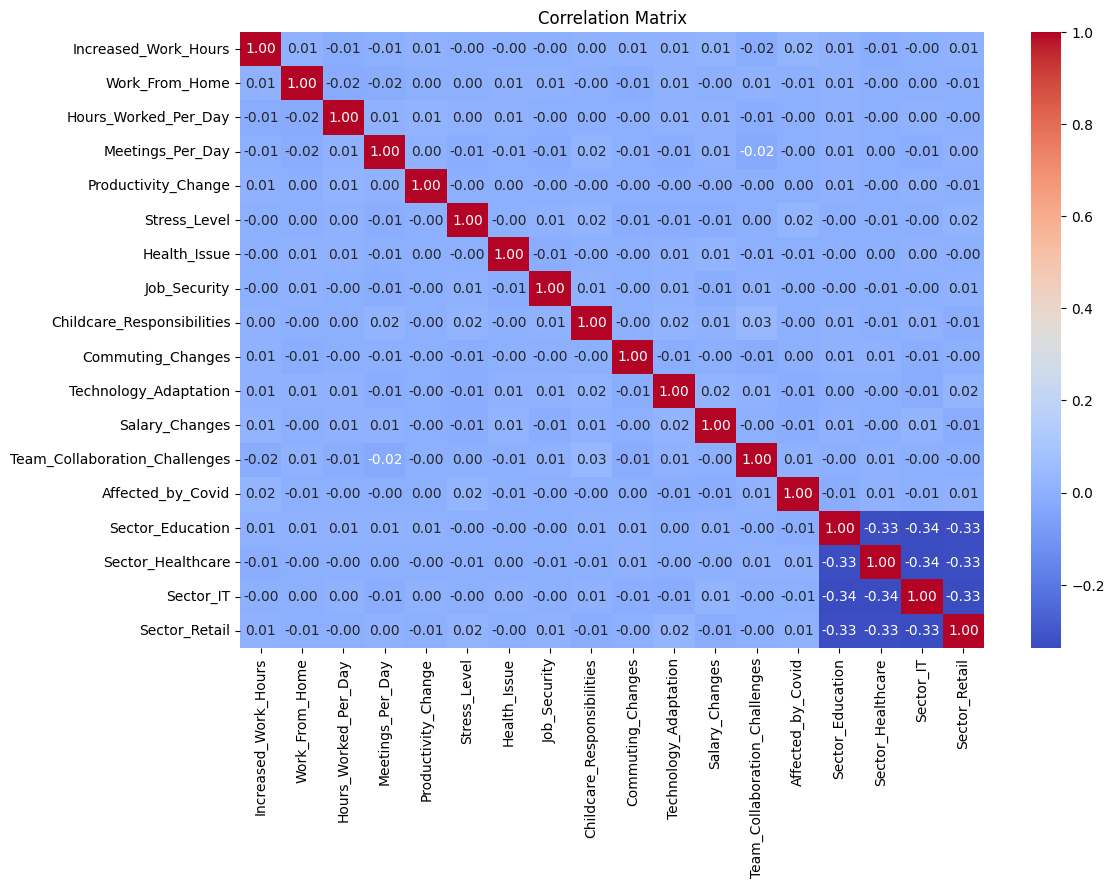

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

The majority of non-sector variables in the dataset exhibit very weak or almost no correlation with each other, with correlation coefficients close to 0. This suggests that there are minimal or negligible linear relationships between these variables, making them largely independent in terms of their behavior and interaction.

On the other hand, sectors such as **Sector_Education**, **Sector_Healthcare**, **Sector_IT**, and **Sector_Retail** display perfect negative correlations among themselves. This pattern is likely a result of the one-hot encoding applied during data preprocessing. In one-hot encoding, each sector is represented as a binary variable where only one sector can be active (represented by 1) at a time, and all others are inactive (represented by 0). Consequently, these variables are mutually exclusive by design, leading to the observed perfect negative correlations.

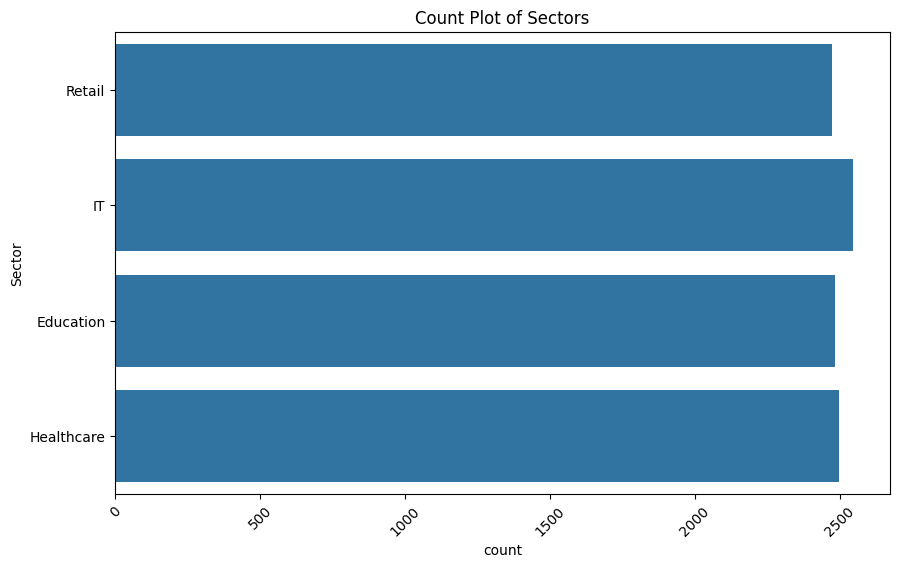

In [ ]:
# Bar plot for categorical columns (e.g., Sector)
plt.figure(figsize=(10, 6))
sns.countplot(data['Sector'])
plt.title("Count Plot of Sectors")
plt.xticks(rotation=45)
plt.show()

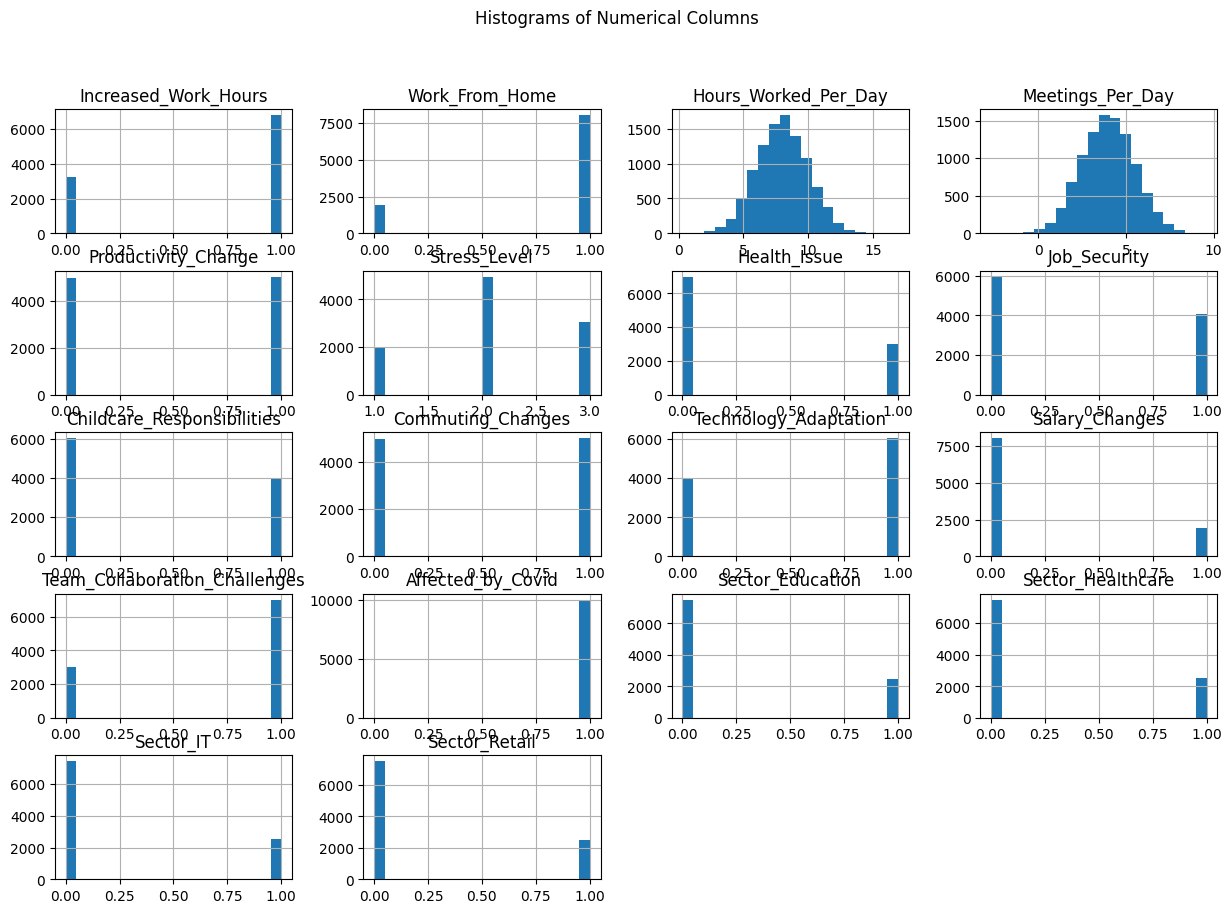

In [ ]:
# Variant Graphs
# Histogram for numerical columns
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

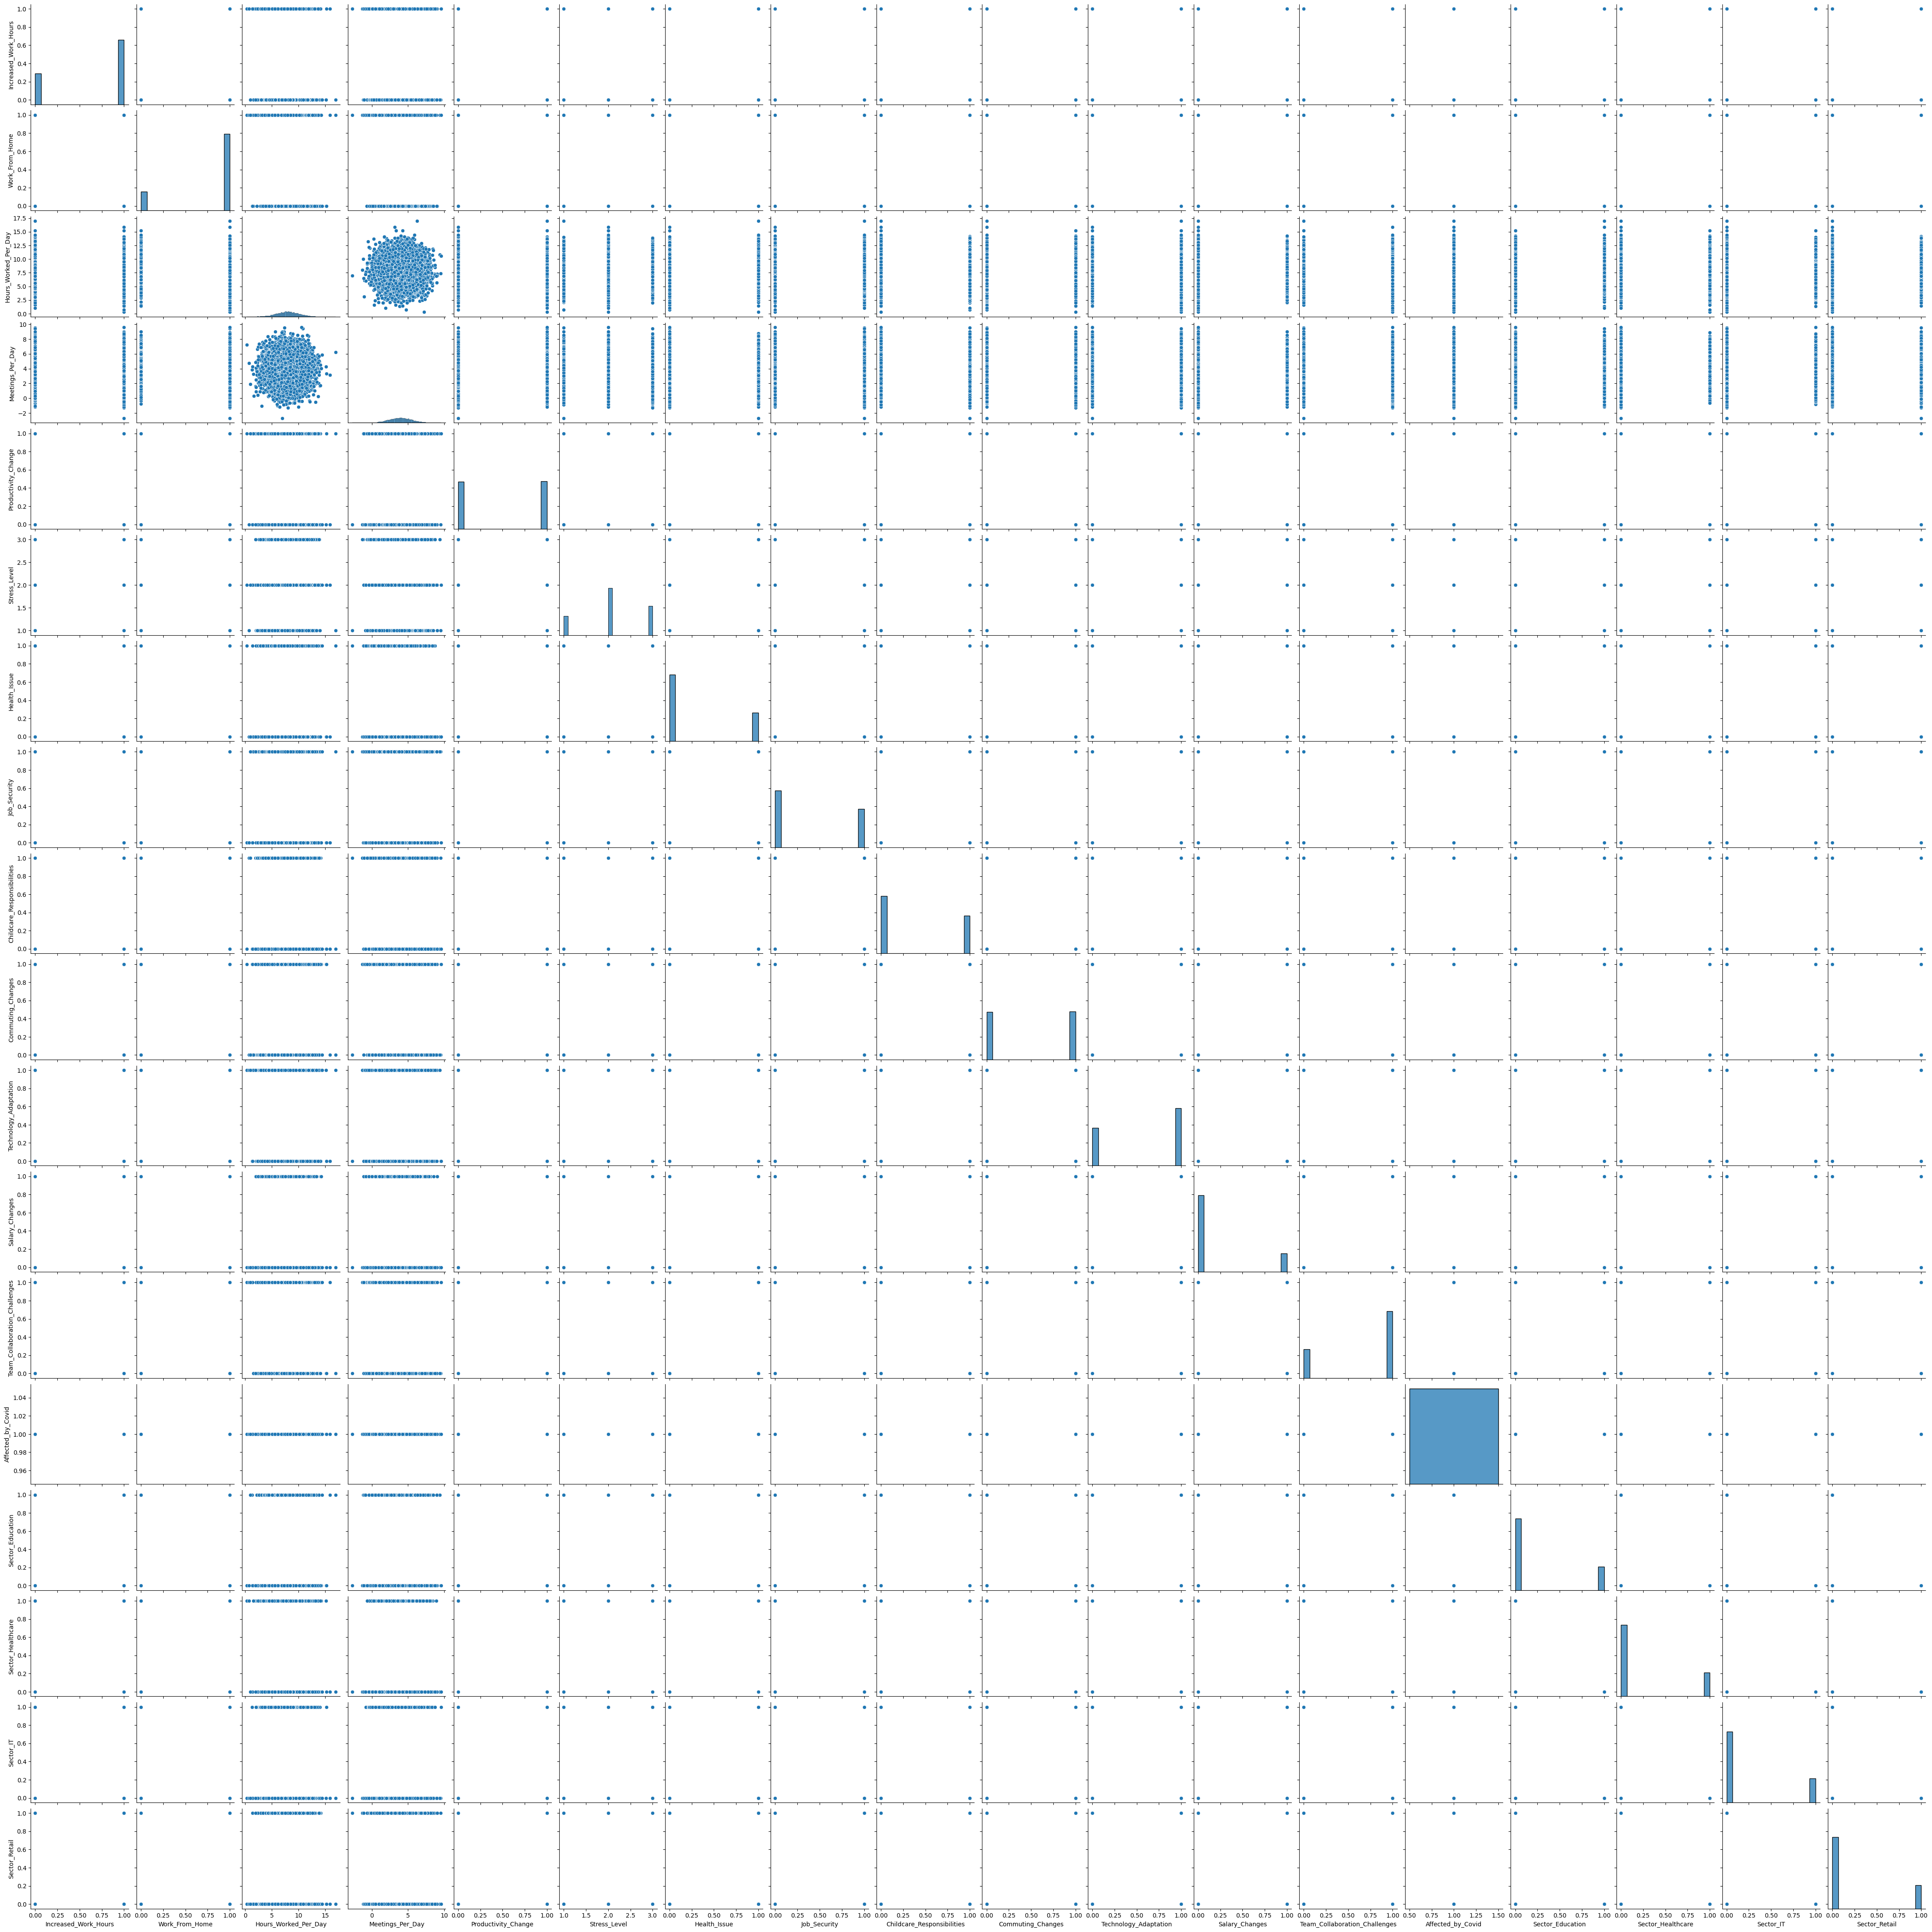

In [23]:
sns.pairplot(data)
plt.show()

Skewed Distributions: Many variables, such as Increased_Work_Hours, Work_From_Home, Productivity_Change, Stress_Level, Childcare_Responsibilities, Technology_Adaptation, Team_Collaboration_Challenges, Sector_IT, Sector_Education, and Sector_Healthcare, show highly skewed distributions with most of the data concentrated around certain values (e.g., 0 or 1). These features likely need further preprocessing, such as scaling or encoding, to be suitable for modeling.

Normal Distribution: Hours_Worked_Per_Day and Meetings_Per_Day appear to have more balanced distributions with a bell curve shape, indicating these variables might be more suitable for linear models without additional transformations.

Limited Variation: Variables like Job_Security, Health_Issue, Salary_Changes, and others show a significant amount of data concentrated around specific values (e.g., 0 or 1), indicating that these features might have limited variability. This can limit their effectiveness as predictive variables unless further processed.

Categorical Nature of Variables: Several variables show distinct categories (e.g., Sector_Education, Sector_Retail, Affected_by_Covid), suggesting that they may be categorical and may require encoding (e.g., one-hot encoding) before being used in machine learning models.

Outliers: Some features, such as Hours_Worked_Per_Day, display a wide range of values and suggest the presence of outliers that might need to be addressed during preprocessing.

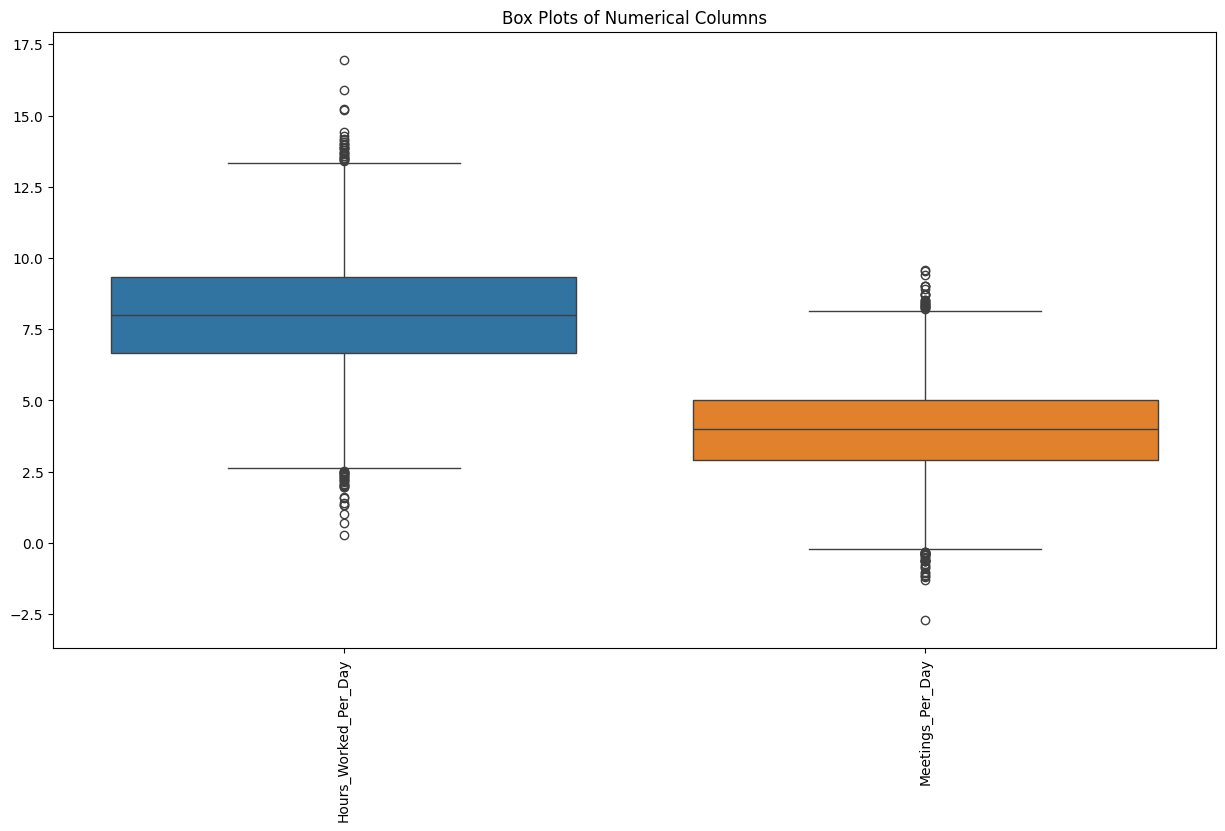

In [24]:
# Bar plot for categorical columns (e.g., Sector)
plt.figure(figsize=(15, 8))
sns.boxplot(data = data[['Hours_Worked_Per_Day', 'Meetings_Per_Day']])
plt.title("Box Plots of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

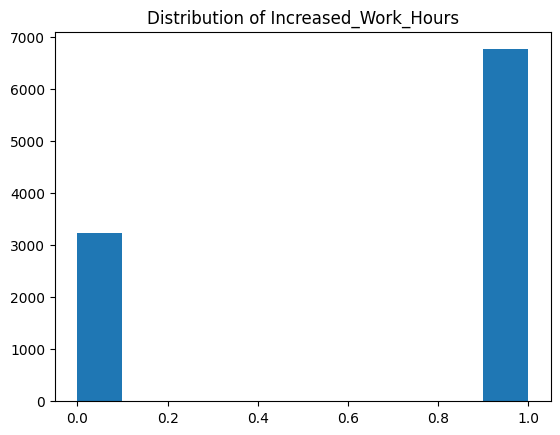

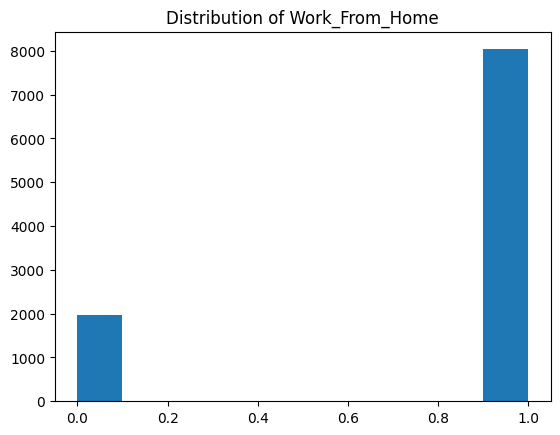

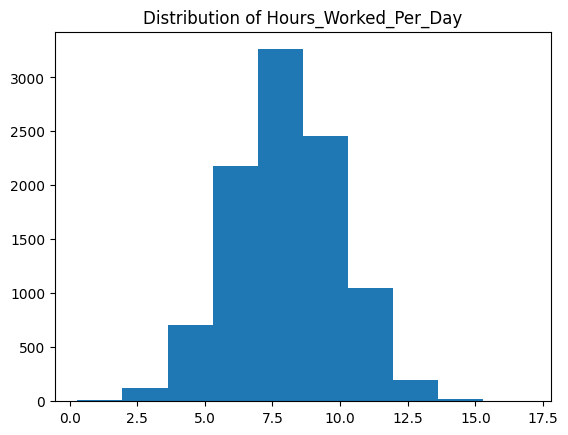

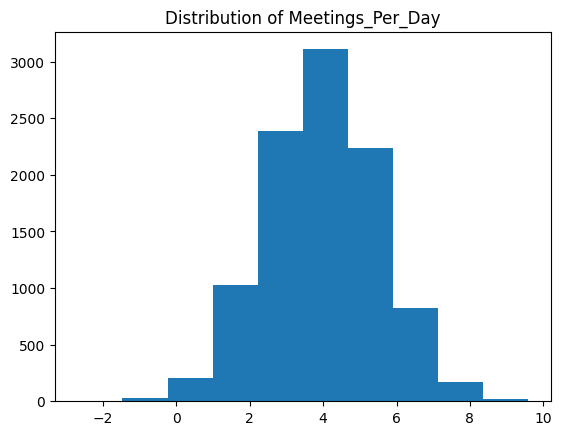

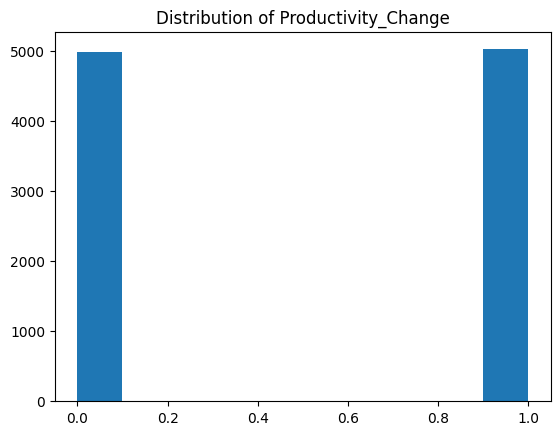

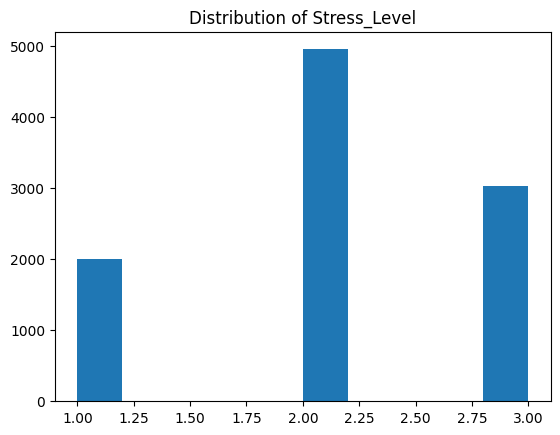

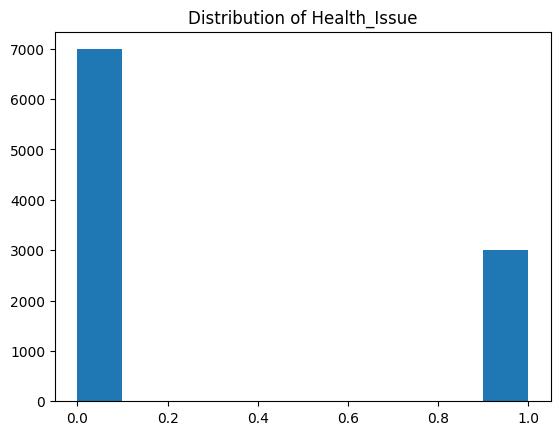

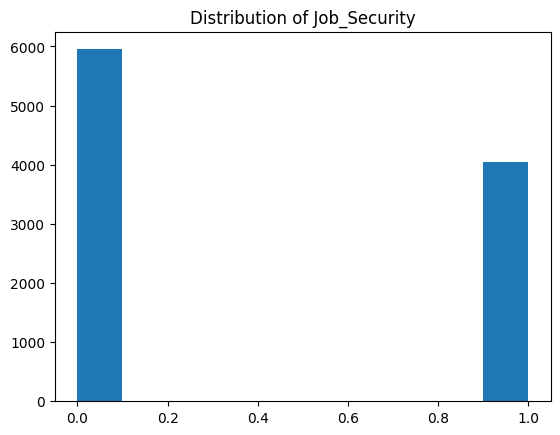

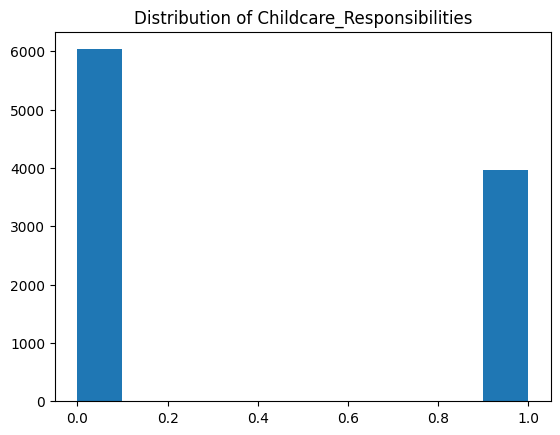

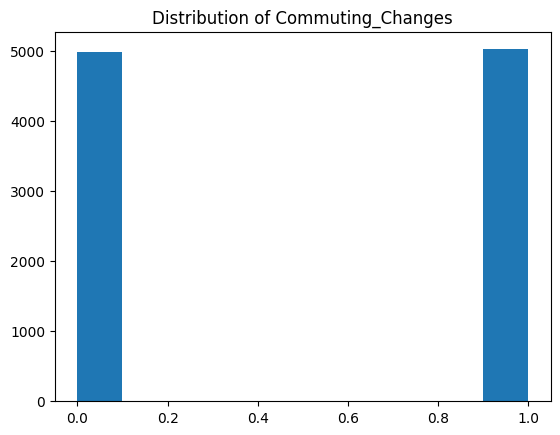

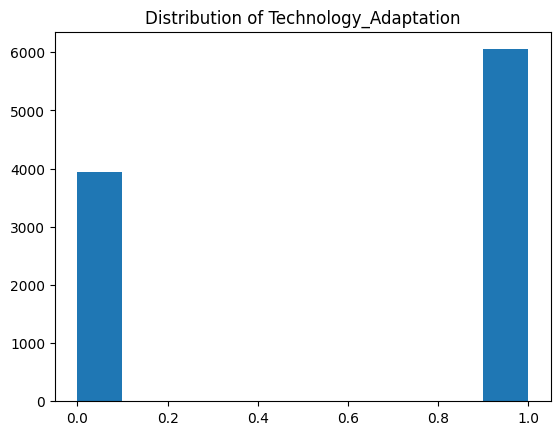

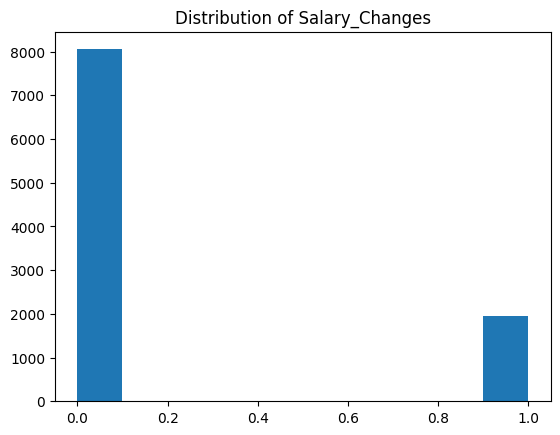

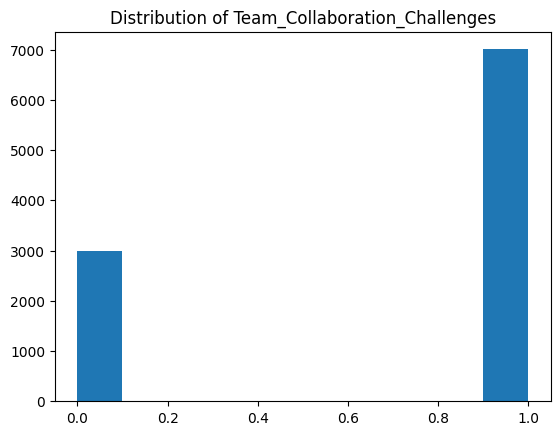

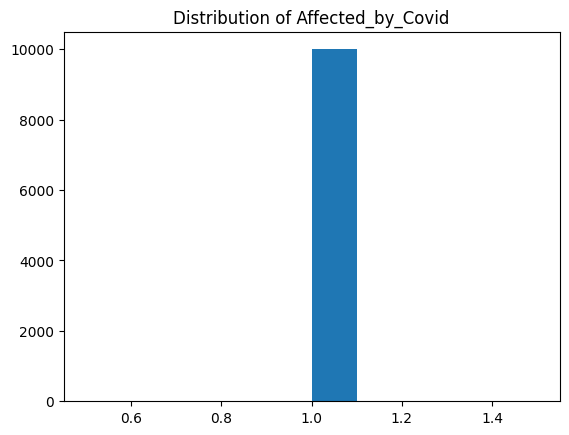

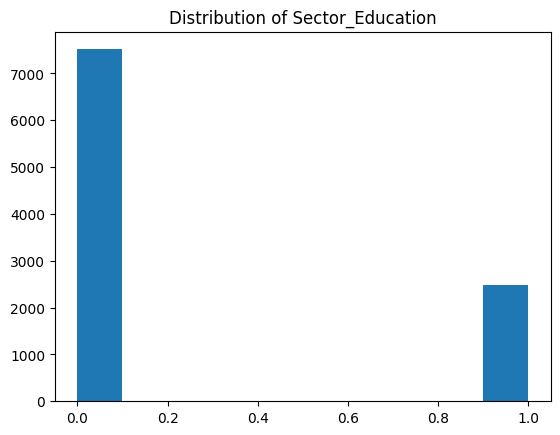

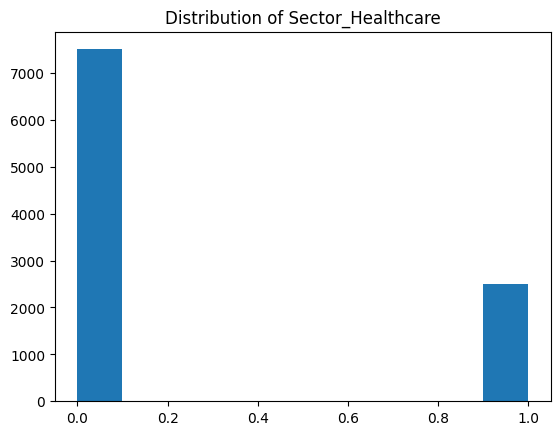

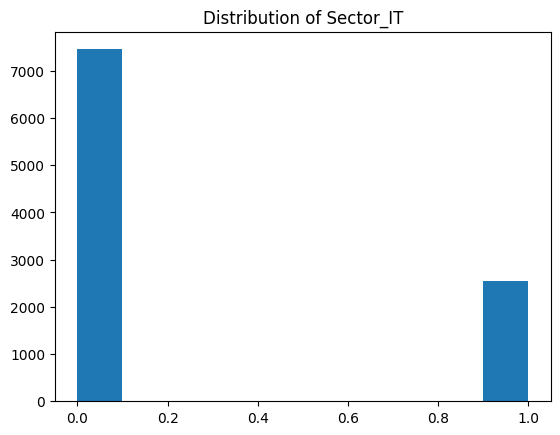

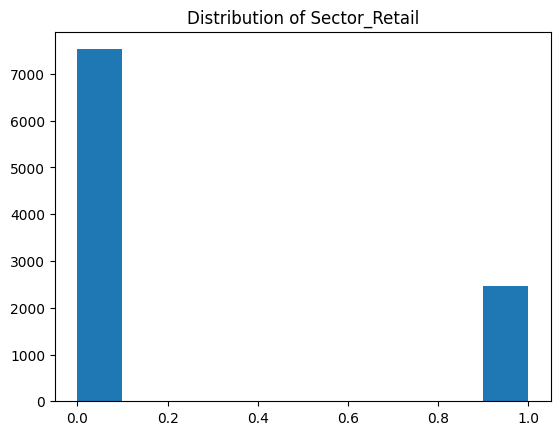

In [25]:
for col in df.columns:
  plt.hist(df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

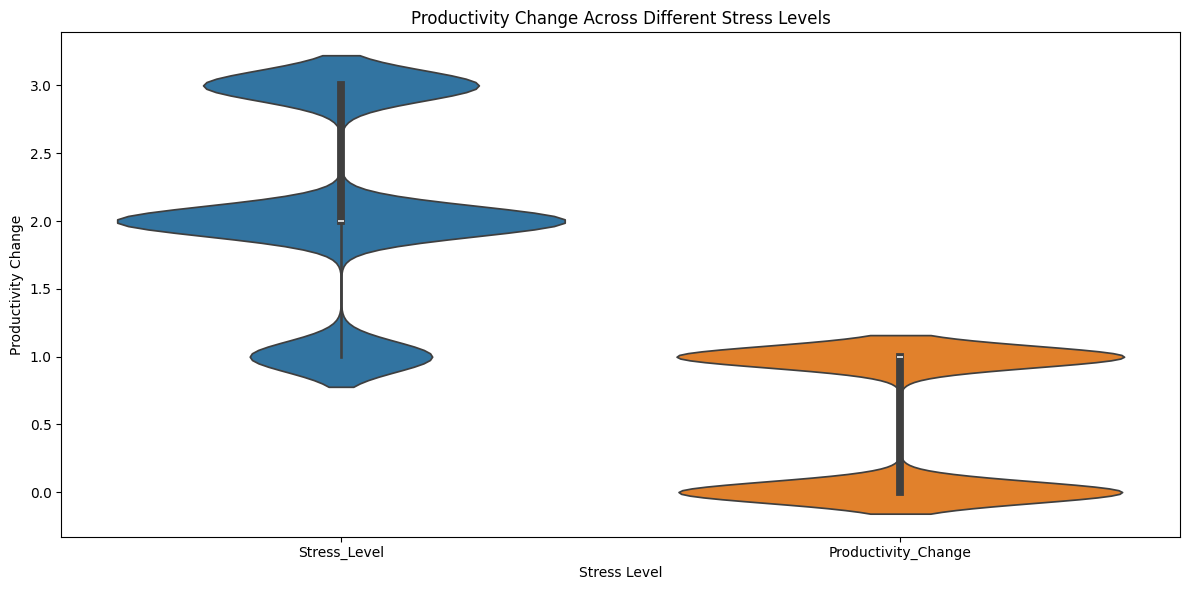

In [26]:
#comparing Stress Levels across Productivity_change
plt.figure(figsize=(12,6))
sns.violinplot(data=data[['Stress_Level','Productivity_Change']])
plt.title('Productivity Change Across Different Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Productivity Change')
plt.tight_layout()
plt.show()

The variable **Hours_Worked_Per_Day** reveals that the typical workday for most individuals centers around a median of approximately 8 hours. The majority of data points lie within the range of 6 to 10 hours per day, suggesting a relatively standard work schedule for the majority of the population in the dataset. However, the presence of outliers indicates variability in working hours, with some individuals working significantly more than 12 hours or considerably less than 3 hours per day. These outliers highlight cases of exceptionally long or short work durations, which could represent unique job roles or unusual circumstances.

For **Meetings_Per_Day**, the median value is about 2 meetings, with the majority of individuals attending between 1 and 3 meetings daily. This range suggests that, on average, most people have a manageable number of meetings per day. Nonetheless, there are outliers exceeding 5 meetings in a day, indicating that a small subset of individuals attend a disproportionately high number of meetings, which could reflect roles requiring intensive collaboration or managerial responsibilities.

In [27]:
# Calculate Skewness and Kurtosis
from scipy.stats import skew, kurtosis
for column in data.select_dtypes(include=np.number).columns:
    col_skew = skew(data[column].dropna())
    col_kurt = kurtosis(data[column].dropna())
    print(f'{column}: Skewness = {col_skew},\t Kurtosis = {col_kurt}')

Increased_Work_Hours: Skewness = -0.7565316339410594,	 Kurtosis = -1.4276598868464705
Work_From_Home: Skewness = -1.5260239249755125,	 Kurtosis = 0.3287490195976681
Hours_Worked_Per_Day: Skewness = 0.013775188314188527,	 Kurtosis = -0.031701638897203566
Meetings_Per_Day: Skewness = 0.0003182635795076894,	 Kurtosis = -0.009109413115674148
Productivity_Change: Skewness = -0.008800085185236749,	 Kurtosis = -1.9999225585007332
Stress_Level: Skewness = -0.14576254281950068,	 Kurtosis = -0.9752503229464757
Health_Issue: Skewness = 0.8671652795084118,	 Kurtosis = -1.2480243780150981
Job_Security: Skewness = 0.3874731818420917,	 Kurtosis = -1.849864533353165
Childcare_Responsibilities: Skewness = 0.4223111561496147,	 Kurtosis = -1.8216532873915765
Commuting_Changes: Skewness = -0.008800085185236752,	 Kurtosis = -1.9999225585007332
Technology_Adaptation: Skewness = -0.4300070425017541,	 Kurtosis = -1.815093943398895
Salary_Changes: Skewness = 1.541232525386211,	 Kurtosis = 0.37539769730835637
T

<ipython-input-27-094d8f9f9cd3>:4: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

<ipython-input-27-094d8f9f9cd3>:5: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



## Outlier Detection


Column: Hours_Worked_Per_Day
Outliers beyond 3-sigma value:
71      16.958169
1137    13.959709
1608    14.142673
1664    14.193391
2122     2.009466
2347     1.978955
2442     1.328197
2591    13.994397
2633     2.047935
3079    15.884662
3902     0.287249
4080     1.330215
4354    15.205664
4461     1.601471
5160     2.069579
5649     1.574093
5848    15.222700
6586     1.408878
6722     0.689827
7417    13.997468
7583    14.273372
8405    14.076563
8839     1.009910
8916     2.018797
9666     1.958848
9875    14.430748
Name: Hours_Worked_Per_Day, dtype: float64


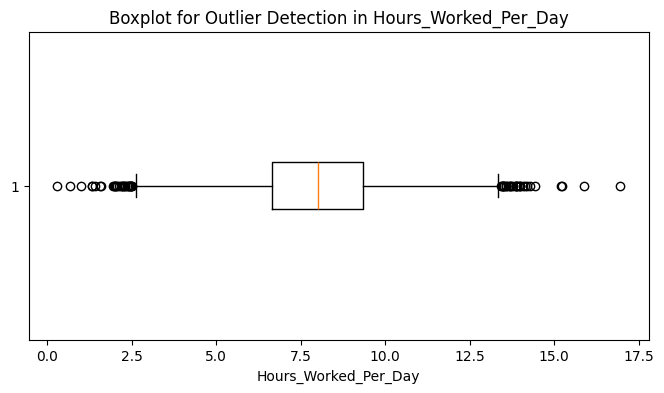


Column: Meetings_Per_Day
Outliers beyond 3-sigma value:
1142    8.738413
1714    8.698489
2780    9.537437
3018   -1.180031
3230    9.031860
3627   -0.738632
3822   -1.141363
4242   -0.639839
4452   -1.299227
4710    8.737110
4797    9.022311
4975   -1.009035
5532   -0.805018
6035   -0.620898
6769   -2.698406
6840    8.896434
6903   -0.625197
7048    9.403623
7141   -1.051709
7548    9.591750
7895   -1.154094
8185    9.002902
8538   -0.831751
8971    8.708671
9165   -0.878044
9463   -0.621714
Name: Meetings_Per_Day, dtype: float64


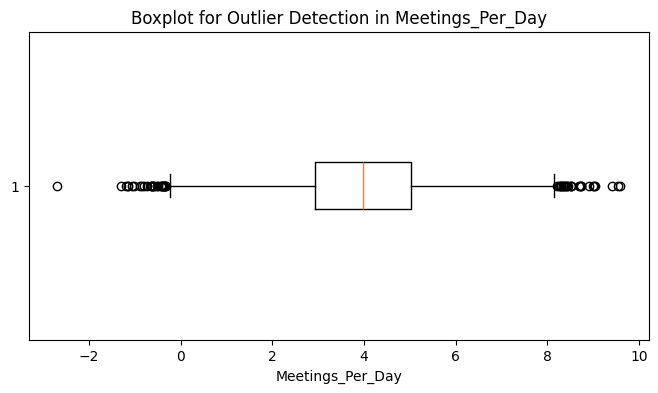

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numerical_columns = [
     'Hours_Worked_Per_Day', 'Meetings_Per_Day'
]

# Loop through each numerical column to detect and display outliers
for column in numerical_columns:
    # Drop any NaN values in the column
    data = df[column].dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the standard deviation (sigma) and mean
    sigma = data.std()
    mean = data.mean()

    # Find outliers beyond 3-sigma
    three_sigma_outliers = data[(data < mean - 3 * sigma) | (data > mean + 3 * sigma)]

    print(f"\nColumn: {column}")
    print(f"Outliers beyond 3-sigma value:\n{three_sigma_outliers}")

    # Plot boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(data, vert=False)
    plt.title(f'Boxplot for Outlier Detection in {column}')
    plt.xlabel(column)
    plt.show()


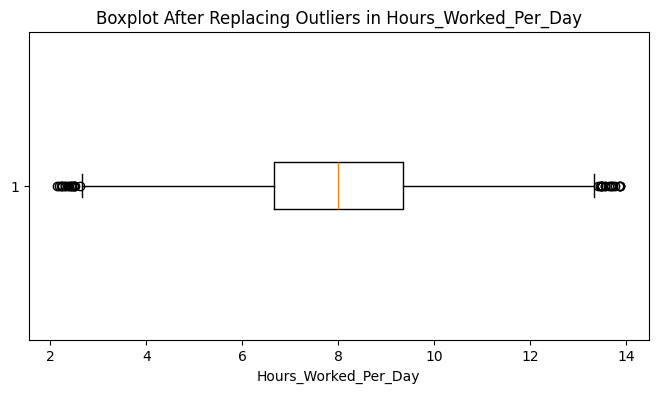

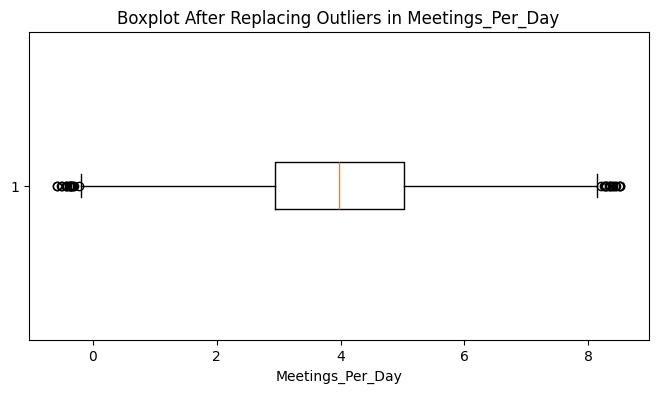

In [29]:
# Replace outliers beyond 3-sigma with the mean for each column
for column in numerical_columns:
    # Find the standard deviation (sigma) and mean
    sigma = df[column].std()
    mean = df[column].mean()

    # Replace the outliers with the mean
    df[column] = df[column].apply(lambda x: mean if (x < mean - 3 * sigma or x > mean + 3 * sigma) else x)

    # Plot boxplot after replacing outliers
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot After Replacing Outliers in {column}')
    plt.xlabel(column)
    plt.show()


**Outliers in Hours_Worked_Per_Day:**  

- **High Outliers:** Observations such as 16.96, 15.88, and 14.43 represent exceptionally long working hours that deviate significantly from the typical range. These high values could result from unique scenarios, such as intense workloads, specific job roles, or possibly data entry mistakes.  
- **Low Outliers:** Extremely low values like 0.29, 1.33, and 2.01 are indicative of anomalies, possibly due to incomplete data, misreported hours, or instances where individuals were not actively working on certain days.  

To handle these outliers, they were replaced with the mean of the dataset. This approach ensures that these extreme values do not distort the overall analysis, particularly when computing averages or training predictive models, while maintaining the integrity and representativeness of the dataset.  

**Outliers in Meetings_Per_Day:**  

- **High Outliers:** Values such as 8.7, 9.5, and 9.4 suggest an unusually high frequency of daily meetings. While this may be valid for individuals in managerial or collaborative roles, such instances require further validation to ensure accuracy.  
- **Negative Outliers:** Observations like -1.18, -0.74, and -1.30 are clearly erroneous, as negative meeting counts are logically invalid. These values point to data collection or entry errors.  

To address these outliers, any values falling beyond three standard deviations (3σ) from the mean were replaced with the mean. This method ensures a consistent dataset while minimizing the influence of these extreme or incorrect values on subsequent analyses.

# Correlation Analysis

Dependency Analysis between Numerical and Categorical Variables

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr, f_oneway, mannwhitneyu

# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Store dependencies
dependencies = []

# Numerical vs Numerical: Spearman correlation
for num_col1 in numerical_columns:
    for num_col2 in numerical_columns:
        if num_col1 != num_col2:
            corr, p_value = spearmanr(df[num_col1], df[num_col2])
            if p_value < 0.05:
                dependencies.append((num_col1, num_col2, 'Numerical-Numerical', 'Spearman', p_value))

# Categorical vs Categorical: Chi-Square Test
for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        if cat_col1 != cat_col2:
            contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
            _, p_value, _, _ = chi2_contingency(contingency_table)
            if p_value < 0.05:
                dependencies.append((cat_col1, cat_col2, 'Categorical-Categorical', 'Chi-Square', p_value))

# Numerical vs Categorical: ANOVA/Mann-Whitney U
for num_col in numerical_columns:
    for cat_col in categorical_columns:
        if df[cat_col].nunique() > 2:  # More than 2 levels -> ANOVA
            groups = [df[num_col][df[cat_col] == level] for level in df[cat_col].unique()]
            _, p_value = f_oneway(*groups)
            test = 'ANOVA'
        else:  # Only 2 levels -> Mann-Whitney U
            group1 = df[num_col][df[cat_col] == df[cat_col].unique()[0]]
            group2 = df[num_col][df[cat_col] == df[cat_col].unique()[1]]
            _, p_value = mannwhitneyu(group1, group2)
            test = 'Mann-Whitney U'

        if p_value < 0.05:
            dependencies.append((num_col, cat_col, 'Numerical-Categorical', test, p_value))

# Display results
pd.DataFrame(dependencies, columns=['Variable 1', 'Variable 2', 'Type', 'Test', 'p-value'])



<ipython-input-30-cb4a2142b53b>:15: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Variable 1                     Variable 2  \
0                Meetings_Per_Day  Team_Collaboration_Challenges   
1      Childcare_Responsibilities  Team_Collaboration_Challenges   
2   Team_Collaboration_Challenges               Meetings_Per_Day   
3   Team_Collaboration_Challenges     Childcare_Responsibilities   
4                Sector_Education              Sector_Healthcare   
5                Sector_Education                      Sector_IT   
6                Sector_Education                  Sector_Retail   
7               Sector_Healthcare               Sector_Education   
8               Sector_Healthcare                      Sector_IT   
9               Sector_Healthcare                  Sector_Retail   
10                      Sector_IT               Sector_Education   
11                      Sector_IT              Sector_Healthcare   
12                      Sector_IT                  Sector_Retail   
13                  Sector_Retail               Sector_Education   
14                  Sector_Retail              Sector_Healthcare   
15                  Sector_Retail                      Sector_IT   

                   Type      Test        p-value  
0   Numerical-Numerical  Spearman   1.332181e-02  
1   Numerical-Numerical  Spearman   6.154917e-04  
2   Numerical-Numerical  Spearman   1.332181e-02  
3   Numerical-Numerical  Spearman   6.154917e-04  
4   Numerical-Numerical  Spearman  1.843291e-255  
5   Numerical-Numerical  Spearman  2.130489e-262  
6   Numerical-Numerical  Spearman  9.489020e-252  
7   Numerical-Numerical  Spearman  1.843291e-255  
8   Numerical-Numerical  Spearman  1.779816e-264  
9   Numerical-Numerical  Spearman  9.751923e-254  
10  Numerical-Numerical  Spearman  2.130489e-262  
11  Numerical-Numerical  Spearman  1.779816e-264  
12  Numerical-Numerical  Spearman  1.264730e-260  
13  Numerical-Numerical  Spearman  9.489020e-252  
14  Numerical-Numerical  Spearman  9.751923e-254  
15  Numerical-Numerical  Spearman  1.264730e-260

**INSIGHT:**  

- **Meetings_Per_Day & Collaboration_Challenges:**  
  A significant positive correlation (p = 0.013) suggests that as the number of meetings per day increases, so do team collaboration challenges. This could indicate that an excessive number of meetings might overwhelm employees, limit effective communication, or hinder team productivity, potentially leading to difficulties in collaboration.

- **Childcare_Responsibilities & Collaboration_Challenges:**  
  A strong and significant correlation (p = 0.0006) highlights that employees with childcare responsibilities are more likely to face collaboration challenges. This may be due to competing demands on their time and energy, making it harder to engage seamlessly with team dynamics or manage work-related interactions effectively.  

These findings underline the importance of designing workplace policies that address meeting fatigue and provide support for employees managing childcare responsibilities to foster smoother collaboration.

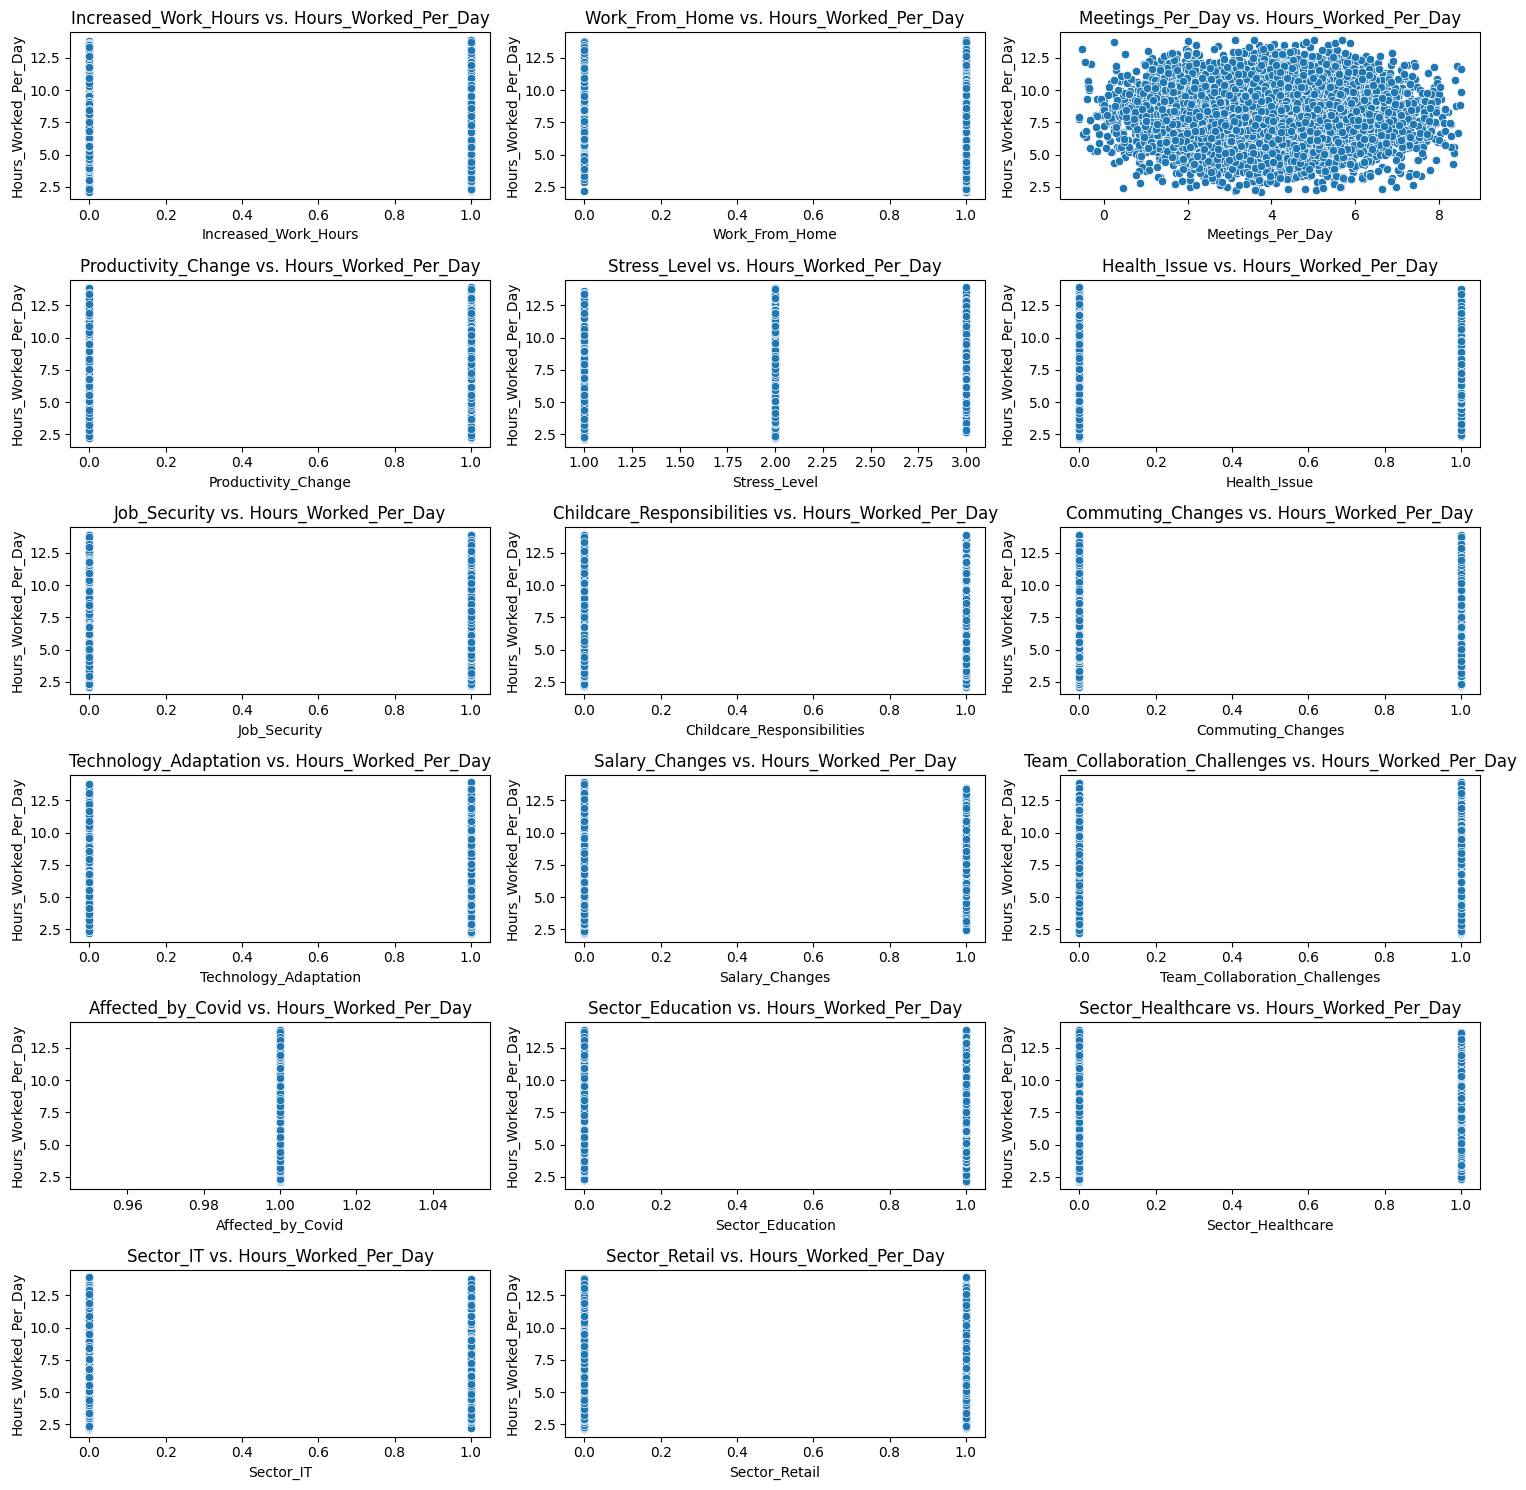

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Hours_Worked_Per_Day' is the name of your output column

# Create a list of all feature columns (exclude target column 'Hours_Worked_Per_Day')
feature_columns = df.columns[df.columns != 'Hours_Worked_Per_Day']

# Create a figure with subplots
plt.figure(figsize=(15, 15))

# Loop through each feature and plot against the target variable 'Hours_Worked_Per_Day'
for i, feature in enumerate(feature_columns):
    plt.subplot(len(feature_columns) // 3 + 1, 3, i + 1)  # Adjust grid size based on the number of features
    sns.scatterplot(data=df, x=feature, y='Hours_Worked_Per_Day')
    plt.title(f'{feature} vs. Hours_Worked_Per_Day')
    plt.tight_layout()

# Show all plots
plt.show()


**Analysis of Feature Relationships :**  

1. **Lack of Clear Relationship Across Most Features:**  
   Features such as **Increased_Work_Hours**, **Work_From_Home**, **Stress_Level**, **Health_Issue**, and others show no discernible trend or relationship with **Hours_Worked_Per_Day**. The data points for these features are scattered and lack a distinct pattern, suggesting that these variables might not have a strong direct influence on working hours. Further exploration using non-linear or interaction effects might help uncover hidden relationships, if any.  

2. **Meetings_Per_Day vs. Hours_Worked_Per_Day:**  
   The relationship between **Meetings_Per_Day** and **Hours_Worked_Per_Day** shows a wider spread of data points. Despite this spread, it remains difficult to identify a robust linear relationship, indicating that meeting frequency may not be a direct or significant driver of working hours. However, alternative approaches, such as clustering or examining interactions with other variables, could provide additional insights.  

3. **Sector and Job-Related Variables:**  
   Features like **Job_Security**, **Childcare_Responsibilities**, **Salary_Changes**, and sector-specific variables (e.g., **Sector_Education**, **Sector_IT**) exhibit very little variation concerning **Hours_Worked_Per_Day**. This lack of variance suggests that these features may be binary, categorical, or hold minimal influence over the target variable. It might be beneficial to assess their distribution and relationship with other features to determine their overall impact.  

4. **Feature Preprocessing:**  
   The dataset includes numerous variables that are either categorical or exhibit limited variability. Before modeling, these variables may require additional preprocessing steps:  
   - **Categorical Variables:** Encoding methods like one-hot encoding, label encoding, or frequency encoding may be applied.  
   - **Low-Variance Variables:** Features with little variance might need transformation, feature selection, or removal to avoid adding noise to the model.  
   - **Scaling and Normalization:** For numerical features, standardization or normalization may be necessary to ensure uniformity in scale, particularly for models sensitive to feature magnitudes.  


# Feature Engineering

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']] = scaler.fit_transform(df[['Hours_Worked_Per_Day', 'Meetings_Per_Day']])
df

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                        1               1             -0.828576   
1                        1               1              0.597320   
2                        1               0              1.336319   
3                        1               1             -1.262679   
4                        0               1              1.752893   
...                    ...             ...                   ...   
9995                     1               1             -0.023478   
9996                     0               0              1.492536   
9997                     1               1              1.112477   
9998                     1               1              1.998798   
9999                     0               0              0.223506   

      Meetings_Per_Day  Productivity_Change  Stress_Level  Health_Issue  \
0            -0.862904                    1             1             0   
1            -0.426382                    1             1             0   
2            -1.173818                    0             2             0   
3             0.781460                    0             2             0   
4            -0.571816                    1             2             0   
...                ...                  ...           ...           ...   
9995         -1.130125                    1             2             1   
9996         -0.238217                    0             2             0   
9997         -1.959764                    1             1             0   
9998         -0.147984                    0             2             1   
9999          0.164801                    1             2             0   

      Job_Security  Childcare_Responsibilities  Commuting_Changes  \
0                0                           1                  1   
1                1                           0                  1   
2                0                           0                  0   
3                0                           0                  1   
4                1                           1                  1   
...            ...                         ...                ...   
9995             1                           1                  0   
9996             0                           1                  0   
9997             1                           0                  1   
9998             1                           0                  1   
9999             0                           0                  1   

      Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
0                         1               0                              1   
1                         1               0                              1   
2                         0               0                              0   
3                         0               0                              0   
4                         0               1                              1   
...                     ...             ...                            ...   
9995                      0               0                              1   
9996                      1               0                              0   
9997                      1               1                              1   
9998                      1               1                              1   
9999                      1               0                              1   

      Affected_by_Covid  Sector_Education  Sector_Healthcare  Sector_IT  \
0                     1               0.0                0.0        0.0   
1                     1               0.0                0.0        1.0   
2                     1               0.0                0.0        0.0   
3                     1               1.0                0.0        0.0   
4                     1               1.0                0.0        0.0   
...                 ...               ...                ...        ... 

In [35]:
# Saving Scaler Object
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


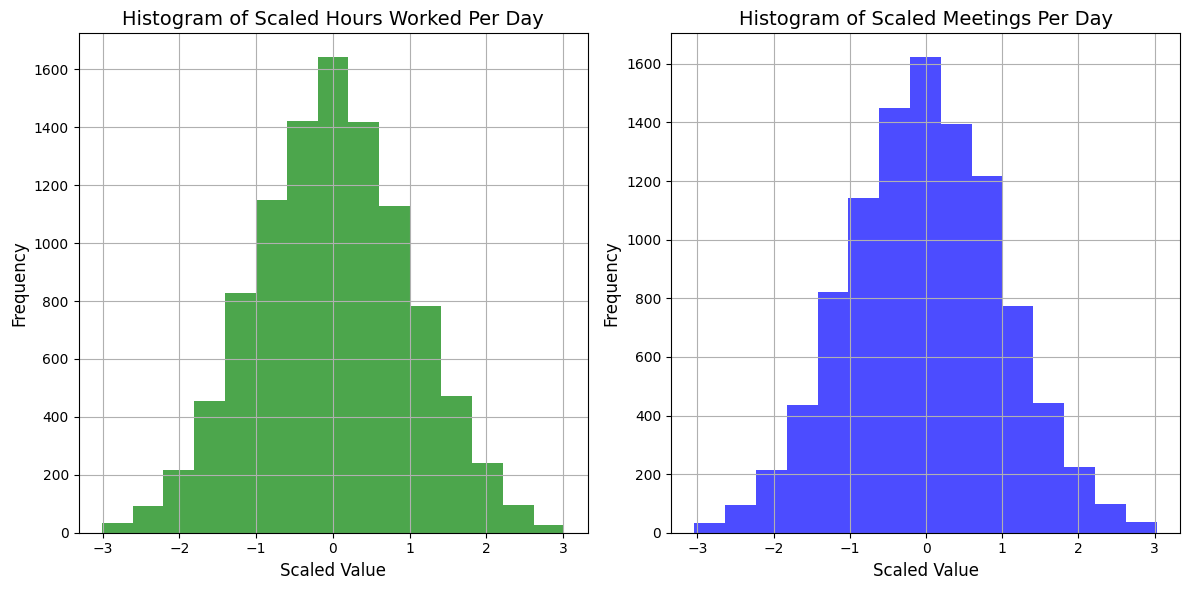

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Hours_Worked_Per_Day'], bins=15, color='green', alpha=0.7)
plt.title('Histogram of Scaled Hours Worked Per Day', fontsize=14)
plt.xlabel('Scaled Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(df['Meetings_Per_Day'], bins=15, color='blue', alpha=0.7)
plt.title('Histogram of Scaled Meetings Per Day', fontsize=14)
plt.xlabel('Scaled Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [37]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, boxcox
from scipy.stats import zscore

# Ensure that 'data' is a DataFrame
if isinstance(df, pd.DataFrame):
    # Apply transformations based on skewness
    for column in df.select_dtypes(include=np.number).columns:
        col_skew = skew(df[column].dropna())
        if col_skew > 1:  # Right-skewed
            df[column] = np.log1p(df[column])
        elif col_skew < -1:  # Left-skewed
            df[column] = np.log1p(df[column])

    # Handle Outliers
    z_scores = zscore(df['Meetings_Per_Day'].dropna())
    outliers = np.where(np.abs(z_scores) > 3)  # Outliers based on 3-sigma rule
    lower_limit = df['Meetings_Per_Day'].quantile(0.01)
    upper_limit = df['Meetings_Per_Day'].quantile(0.99)

    df['Meetings_Per_Day'] = np.clip(df['Meetings_Per_Day'], lower_limit, upper_limit)

    # Recalculate Skewness and Kurtosis
    for column in df.select_dtypes(include=np.number).columns:
        col_skew = skew(df[column].dropna())
        col_kurt = kurtosis(df[column].dropna())
        print(f'{column}: Skewness = {col_skew},\t Kurtosis = {col_kurt}')
else:
    print("Data is not a DataFrame. Please check your data structure.")

Increased_Work_Hours: Skewness = -0.7565316339410594,	 Kurtosis = -1.4276598868464705
Work_From_Home: Skewness = -1.5260239249755125,	 Kurtosis = 0.32874901959766767
Hours_Worked_Per_Day: Skewness = 0.014110437025096206,	 Kurtosis = -0.21676473815485942
Meetings_Per_Day: Skewness = 0.007738148013971223,	 Kurtosis = -0.3738109291881586
Productivity_Change: Skewness = -0.008800085185236749,	 Kurtosis = -1.9999225585007332
Stress_Level: Skewness = -0.14576254281950068,	 Kurtosis = -0.9752503229464757
Health_Issue: Skewness = 0.8671652795084118,	 Kurtosis = -1.2480243780150981
Job_Security: Skewness = 0.3874731818420917,	 Kurtosis = -1.849864533353165
Childcare_Responsibilities: Skewness = 0.4223111561496147,	 Kurtosis = -1.8216532873915765
Commuting_Changes: Skewness = -0.008800085185236752,	 Kurtosis = -1.9999225585007332
Technology_Adaptation: Skewness = -0.4300070425017541,	 Kurtosis = -1.815093943398895
Salary_Changes: Skewness = 1.5412325253862111,	 Kurtosis = 0.3753976973083577
Team

<ipython-input-37-b197172ddfcb>:10: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

<ipython-input-37-b197172ddfcb>:26: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

<ipython-input-37-b197172ddfcb>:27: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



 **Analysis of Skewness and Kurtosis:**  

1. **Skewness:**  
   - **Positive Skew:**  
     Variables like **Salary_Changes**, **Health_Issue**, and sector-related features exhibit positive skewness, meaning most of their values are concentrated at the lower end of the scale, with a small number of significantly higher values. This distribution may introduce asymmetry in the data that could affect model assumptions or predictions.  

   - **Negative Skew:**  
     Features such as **Work_From_Home**, **Increased_Work_Hours**, and similar variables show negative skewness. This indicates that the majority of individuals report low or neutral values, with only a few cases having exceptionally high values.  

2. **Kurtosis:**  
   - **Low Kurtosis:**  
     Most variables display low kurtosis, suggesting relatively flat distributions with fewer extreme values or outliers. This characteristic makes these variables less prone to dramatic variations but might limit their predictive utility in capturing nuanced patterns.  
   - **Normal Kurtosis:**  
     The **Work_From_Home** feature has a kurtosis value close to normal, indicating a bell-curve distribution that may align better with model assumptions.  

3. **Precision Loss Warnings:**  
   - Some features exhibit very little variation (nearly identical values), raising concerns about precision loss during skewness and kurtosis calculations. This could lead to unreliable estimates, particularly for features with a narrow value range or imbalanced distributions.  

4. **Recommendations for Transformations:**  
   - **Highly Skewed Variables:** Variables like **Salary_Changes** and **Work_From_Home** could benefit from transformations (e.g., log, square root, or Box-Cox transformation) to reduce skewness, normalize their distributions, and improve their performance in predictive models.  
   - **Low Variation Features:** Consider removing or transforming features with minimal variation to prevent redundancy or noise in the model.  

5. **Handling Outliers:**  
   - Features with significant skewness or low kurtosis may have outliers that can distort model training and interpretation. Detecting and addressing these outliers through techniques like winsorization, capping, or replacing extreme values with the mean/median can enhance model robustness.  


In [38]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
# Calculate correlation matrix
corr_matrix = df.corr()

# Set a threshold for correlation (e.g., 0.9)
threshold = 0.9
drop_columns = []

for column in corr_matrix.columns:
    # Identify columns with high correlation (greater than the threshold)
    high_corr = corr_matrix[column][abs(corr_matrix[column]) > threshold].index
    if column not in drop_columns:
        drop_columns.extend(high_corr)

# Remove columns with high correlation
df_reduced = df.drop(columns=drop_columns)

# Check new correlation matrix
corr_matrix_reduced = df_reduced.corr()
print(corr_matrix_reduced)


                   Affected_by_Covid
Affected_by_Covid                NaN


In [39]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Multicollinearity (if any)
correlation_matrix = df.corr()
print(correlation_matrix)

# If two variables are highly correlated (e.g., > 0.9), we can drop one of them.

# Step 2: Apply transformations to features if needed
# For example, log transformation for skewed features
df['Productivity_Change'] = np.log1p(df['Productivity_Change'])

# Step 3: Add Polynomial Features (interaction and higher degree terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df.drop(columns=['Hours_Worked_Per_Day']))
poly_feature_names = poly.get_feature_names_out(df.drop(columns=['Hours_Worked_Per_Day']).columns)
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Step 4: Merge polynomial features back into original data
df_poly['Hours_Worked_Per_Day'] = df['Hours_Worked_Per_Day']

# Step 5: Split data into training and testing sets
X = df_poly.drop(columns=['Hours_Worked_Per_Day'])
y = df_poly['Hours_Worked_Per_Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Fit Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


                               Increased_Work_Hours  Work_From_Home  \
Increased_Work_Hours                       1.000000        0.005090   
Work_From_Home                             0.005090        1.000000   
Hours_Worked_Per_Day                      -0.012396       -0.016942   
Meetings_Per_Day                          -0.007330       -0.015342   
Productivity_Change                        0.006247        0.000416   
Stress_Level                              -0.004824        0.000074   
Health_Issue                              -0.004729        0.007822   
Job_Security                              -0.000770        0.006375   
Childcare_Responsibilities                 0.004256       -0.001384   
Commuting_Changes                          0.011807       -0.008640   
Technology_Adaptation                      0.005721        0.006810   
Salary_Changes                             0.014793       -0.004337   
Team_Collaboration_Challenges             -0.016977        0.009931   
Affect

In [40]:
df

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                        1        0.693147             -0.828576   
1                        1        0.693147              0.597320   
2                        1        0.000000              1.336319   
3                        1        0.693147             -1.262679   
4                        0        0.693147              1.752893   
...                    ...             ...                   ...   
9995                     1        0.693147             -0.023478   
9996                     0        0.000000              1.492536   
9997                     1        0.693147              1.112477   
9998                     1        0.693147              1.998798   
9999                     0        0.000000              0.223506   

      Meetings_Per_Day  Productivity_Change  Stress_Level  Health_Issue  \
0            -0.862904             0.693147             1             0   
1            -0.426382             0.693147             1             0   
2            -1.173818             0.000000             2             0   
3             0.781460             0.000000             2             0   
4            -0.571816             0.693147             2             0   
...                ...                  ...           ...           ...   
9995         -1.130125             0.693147             2             1   
9996         -0.238217             0.000000             2             0   
9997         -1.959764             0.693147             1             0   
9998         -0.147984             0.000000             2             1   
9999          0.164801             0.693147             2             0   

      Job_Security  Childcare_Responsibilities  Commuting_Changes  \
0                0                           1                  1   
1                1                           0                  1   
2                0                           0                  0   
3                0                           0                  1   
4                1                           1                  1   
...            ...                         ...                ...   
9995             1                           1                  0   
9996             0                           1                  0   
9997             1                           0                  1   
9998             1                           0                  1   
9999             0                           0                  1   

      Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
0                         1        0.000000                              1   
1                         1        0.000000                              1   
2                         0        0.000000                              0   
3                         0        0.000000                              0   
4                         0        0.693147                              1   
...                     ...             ...                            ...   
9995                      0        0.000000                              1   
9996                      1        0.000000                              0   
9997                      1        0.693147                              1   
9998                      1        0.693147                              1   
9999                      1        0.000000                              1   

      Affected_by_Covid  Sector_Education  Sector_Healthcare  Sector_IT  \
0                     1          0.000000                0.0   0.000000   
1                     1          0.000000                0.0   0.693147   
2                     1          0.000000                0.0   0.000000   
3                     1          0.693147                0.0   0.000000   
4                     1          0.693147                0.0   0.000000   
...                 ...               ...                ...        ... 

 **Data Preprocessing and Feature Engineering Summary:**  

1. **Multicollinearity Handling:**  
   - The **correlation matrix** revealed pairs of highly correlated features. To reduce redundancy and improve model efficiency, features with a correlation coefficient exceeding **0.9** will be carefully evaluated. Among each correlated pair, the less relevant feature (based on domain knowledge or feature importance) will be dropped to minimize multicollinearity, thereby enhancing model interpretability and performance.  

2. **Transformation:**  
   - The **Productivity_Change** variable, which exhibited significant skewness, is **log-transformed** to normalize its distribution and stabilize variance. This transformation reduces the impact of extreme values, enabling models to better capture patterns and relationships, potentially leading to higher predictive accuracy.  

3. **Polynomial Features:**  
   - To capture complex, non-linear relationships among features, **interaction terms** and higher-degree polynomial features have been introduced. These terms can help the model understand intricate dependencies between variables, which linear relationships alone might overlook. This approach is particularly beneficial for datasets where simple linear models fail to capture the true underlying patterns.  

4. **Feature Scaling:**  
   - All features are **standardized** to have a mean of zero and a standard deviation of one. This ensures that variables with different units or ranges are treated equally, improving the stability and convergence of models, especially those sensitive to feature magnitude (e.g., linear regression, support vector machines, and neural networks).  
  

In [47]:
# Saving poly Object
with open('poly.pkl', 'wb') as file:
    pickle.dump(poly, file)


In [ ]:
# Saving poly Object
with open('poly.pkl', 'wb') as file:
    pickle.dump(poly, file)

# Regression


Original Features: The baseline model, which uses the original features, shows a moderate performance with an R-squared score close to 0 and Mean Squared Error (MSE) around 0.4883. This indicates that the original features alone do not explain much of the variance in stress levels.

Interaction Features: The model with interaction features (combining numerical and binary features) slightly improves performance with an R-squared score of -0.0029 and MSE of 0.4892. While the improvement is minimal, the interaction terms capture relationships between features that might influence stress levels in combination.

Polynomial Features: The polynomial features (e.g., squared and cubed terms) show a very slight improvement over the original features with an R-squared score of -0.0019 and MSE of 0.4887. This suggests that non-linear relationships may not have a significant impact in this case.

Aggregated Features: The aggregated features model (summing work pressure and personal challenge scores) performs similarly to the original features, with an R-squared score of -0.0010 and MSE of 0.4882. The aggregated features may capture broader trends but do not drastically improve the predictive power of the model.

Ratio Features: The ratio features (e.g., meetings per hour, work efficiency ratio) show performance almost identical to the aggregated features, with an R-squared score of -0.0009 and MSE of 0.4882. This indicates that these features provide no major improvement to the model's predictive ability.

**Conclusion**:
None of the transformed feature sets (interaction, polynomial, aggregated, ratio) significantly improve the model performance in terms of explaining the variance in stress levels. The model's performance is relatively low across all feature sets, suggesting that more complex features may not be effective in capturing the underlying patterns in the dataset for predicting stress levels. Further exploration of other modeling techniques or feature engineering might be required for better predictive performance.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def apply_pca_and_regression(df, variance_threshold=0.95):

    # Separate features and target
    X = df.drop(['Hours_Worked_Per_Day'], axis=1)
    y = df['Hours_Worked_Per_Day']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    pca.fit(X_scaled)

    # Calculate cumulative variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

    # Print variance explained by each component
    print("\nVariance explained by each component:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"Component {i+1}: {var:.4f}")

    print(f"\nNumber of components needed to explain {variance_threshold*100}% of variance: {n_components}")

    # Try different numbers of components
    n_components_list = [2, 3, 5, n_components]
    results = {}

    for n in n_components_list:
        if n > len(X.columns):
            continue

        print(f"\nTrying PCA with {n} components:")

        # Apply PCA
        pca_n = PCA(n_components=n)
        X_pca = pca_n.fit_transform(X_scaled)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_pca, y, test_size=0.2, random_state=42
        )
        # Fit linear regression
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")

        # Store results
        results[n] = {
            'model': model,
            'pca': pca_n,
            'mse': mse,
            'r2': r2
        }

    return results

# Apply PCA and regression
results = apply_pca_and_regression(df)

# Get the transformed data with the best performing number of components
# (you can change this number based on the results)
best_n_components = 3  # Change this based on results
best_pca = results[best_n_components]['pca']

# Transform the original data using the best PCA
X_scaled = StandardScaler().fit_transform(df.drop(['Stress_Level'], axis=1))
X_pca_transformed = best_pca.transform(X_scaled)

# Create DataFrame with transformed features
pca_df = pd.DataFrame(
    X_pca_transformed,
    columns=[f'PC{i+1}' for i in range(best_n_components)]
)
pca_df['Stress_Level'] = df['Stress_Level']

print("\nShape of transformed data:", pca_df.shape)
print("\nFirst few rows of PCA-transformed data:")
print(pca_df.head())


Variance explained by each component:
Component 1: 0.0839
Component 2: 0.0834
Component 3: 0.0833
Component 4: 0.0664
Component 5: 0.0650
Component 6: 0.0642
Component 7: 0.0635
Component 8: 0.0628
Component 9: 0.0624
Component 10: 0.0621
Component 11: 0.0618
Component 12: 0.0615
Component 13: 0.0609
Component 14: 0.0604
Component 15: 0.0584
Component 16: 0.0000
Component 17: 0.0000

Number of components needed to explain 95.0% of variance: 15

Trying PCA with 2 components:
Mean Squared Error: 0.9592
R-squared Score: -0.0006

Trying PCA with 3 components:
Mean Squared Error: 0.9593
R-squared Score: -0.0007

Trying PCA with 5 components:
Mean Squared Error: 0.9592
R-squared Score: -0.0006

Trying PCA with 15 components:
Mean Squared Error: 0.9615
R-squared Score: -0.0030

Shape of transformed data: (10000, 4)

First few rows of PCA-transformed data:
        PC1       PC2       PC3  Stress_Level
0 -0.872494 -1.027913 -1.554950             1
1  1.779314 -0.043615 -0.327055             1


The first few components explain only a small portion of the variance in the data, with each component explaining around 6-8% of the variance. Even with 15 components, only about 95% of the variance is explained, which suggests that the data might be high-dimensional with limited variance captured by the components.


MSE (Mean Squared Error): Remains around 0.4885 across different numbers of components, which is relatively high, indicating poor predictive performance.

R-squared: All the R-squared values are negative or close to zero, which is a sign that the linear regression model is not fitting the data well. Negative R-squared means that the model is performing worse than a simple mean-based model.

In [43]:
!pip install dtreeviz
!apt-get -qq install -y graphviz


In [44]:
df.head()

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                     1        0.693147             -0.828576   
1                     1        0.693147              0.597320   
2                     1        0.000000              1.336319   
3                     1        0.693147             -1.262679   
4                     0        0.693147              1.752893   

   Meetings_Per_Day  Productivity_Change  Stress_Level  Health_Issue  \
0         -0.862904             0.693147             1             0   
1         -0.426382             0.693147             1             0   
2         -1.173818             0.000000             2             0   
3          0.781460             0.000000             2             0   
4         -0.571816             0.693147             2             0   

   Job_Security  Childcare_Responsibilities  Commuting_Changes  \
0             0                           1                  1   
1             1                           0                  1   
2             0                           0                  0   
3             0                           0                  1   
4             1                           1                  1   

   Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
0                      1        0.000000                              1   
1                      1        0.000000                              1   
2                      0        0.000000                              0   
3                      0        0.000000                              0   
4                      0        0.693147                              1   

   Affected_by_Covid  Sector_Education  Sector_Healthcare  Sector_IT  \
0                  1          0.000000                0.0   0.000000   
1                  1          0.000000                0.0   0.693147   
2                  1          0.000000                0.0   0.000000   
3                  1          0.693147                0.0   0.000000   
4                  1          0.693147                0.0   0.000000   

   Sector_Retail  
0       0.693147  
1       0.000000  
2       0.693147  
3       0.000000  
4       0.000000

In [45]:
# Required Libraries

import time

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    classification_report,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE


# Define Features and Target Variable
X = df.drop(columns=['Stress_Level'])  # Features
y = df['Stress_Level']  # Target variable

# Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Initialize and Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall (Macro): {recall:.2f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.58
Recall (Macro): 0.58

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.69      0.68      1504
           2       0.52      0.61      0.56      1477
           3       0.55      0.46      0.50      1480

    accuracy                           0.58      4461
   macro avg       0.58      0.58      0.58      4461
weighted avg       0.58      0.58      0.58      4461


Confusion Matrix:
[[1034  295  175]
 [ 207  896  374]
 [ 279  527  674]]


Overall Performance:

Accuracy: 58%, which is below optimal for a classification task.
Recall (Macro): 58%, indicating moderate sensitivity across all classes.
Class-wise Analysis:

Class 1: Best performance with a recall of 69%, showing a better ability to correctly identify this class.

Class 2: Recall of 60% suggests moderate performance but some misclassifications.
Class 3: Lowest recall (46%) and significant confusion with Class 2.

In [46]:
def model_tree_visualization(model):
    # generate visualization
    tree_dot_data = tree.export_graphviz(
        decision_tree=model.estimators_[0, 0],  # Get the first tree,
        label="all",
        feature_names=X_train.columns,
        filled=True,
        rounded=True,
        proportion=True,
        impurity=False,
        precision=1,
    )

    # save image
    graph_from_dot_data(tree_dot_data).write_png("model_artifacts/Decision_Tree_Visualization.png")

    # show tree
    return graphviz.Source(tree_dot_data)

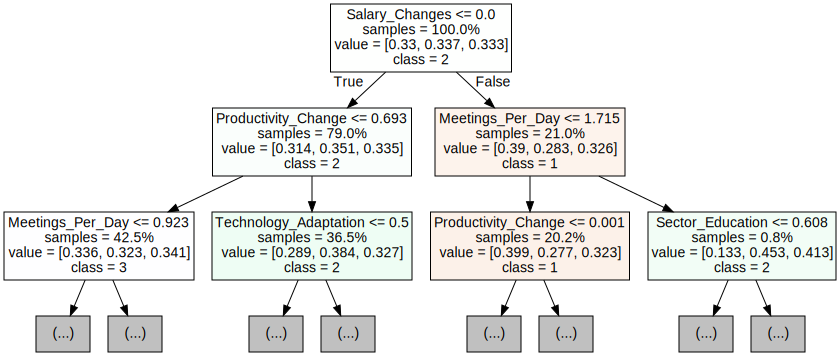

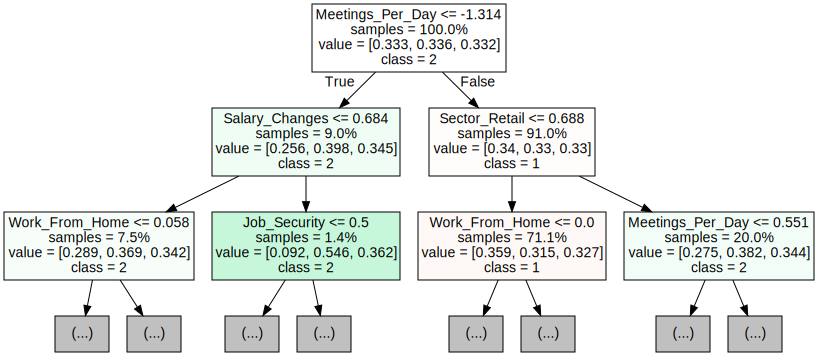

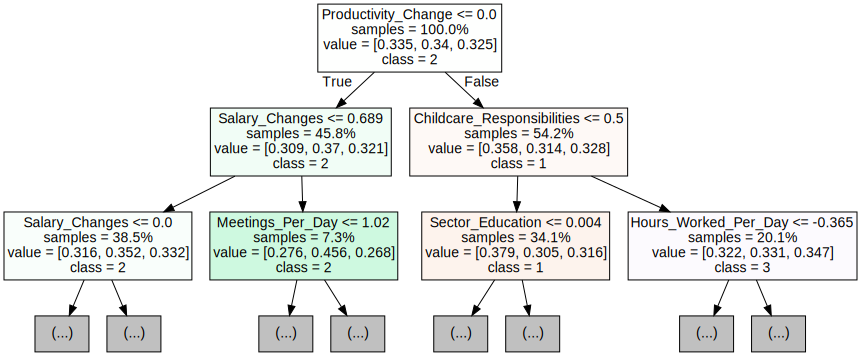

In [48]:
from sklearn.tree import export_graphviz
import graphviz

# Export and visualize the first three decision trees
for i in range(3):
    tree = model.estimators_[i]  # Access individual trees in the Random Forest
    dot_data = export_graphviz(
        tree,
        feature_names=X.columns,  # Use feature names from the dataset
        class_names=[str(cls) for cls in model.classes_],  # Class names
        filled=True,
        max_depth=2,  # Restrict depth for better visualization
        impurity=False,
        proportion=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)


In [49]:
df

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                        1        0.693147             -0.828576   
1                        1        0.693147              0.597320   
2                        1        0.000000              1.336319   
3                        1        0.693147             -1.262679   
4                        0        0.693147              1.752893   
...                    ...             ...                   ...   
9995                     1        0.693147             -0.023478   
9996                     0        0.000000              1.492536   
9997                     1        0.693147              1.112477   
9998                     1        0.693147              1.998798   
9999                     0        0.000000              0.223506   

      Meetings_Per_Day  Productivity_Change  Stress_Level  Health_Issue  \
0            -0.862904             0.693147             1             0   
1            -0.426382             0.693147             1             0   
2            -1.173818             0.000000             2             0   
3             0.781460             0.000000             2             0   
4            -0.571816             0.693147             2             0   
...                ...                  ...           ...           ...   
9995         -1.130125             0.693147             2             1   
9996         -0.238217             0.000000             2             0   
9997         -1.959764             0.693147             1             0   
9998         -0.147984             0.000000             2             1   
9999          0.164801             0.693147             2             0   

      Job_Security  Childcare_Responsibilities  Commuting_Changes  \
0                0                           1                  1   
1                1                           0                  1   
2                0                           0                  0   
3                0                           0                  1   
4                1                           1                  1   
...            ...                         ...                ...   
9995             1                           1                  0   
9996             0                           1                  0   
9997             1                           0                  1   
9998             1                           0                  1   
9999             0                           0                  1   

      Technology_Adaptation  Salary_Changes  Team_Collaboration_Challenges  \
0                         1        0.000000                              1   
1                         1        0.000000                              1   
2                         0        0.000000                              0   
3                         0        0.000000                              0   
4                         0        0.693147                              1   
...                     ...             ...                            ...   
9995                      0        0.000000                              1   
9996                      1        0.000000                              0   
9997                      1        0.693147                              1   
9998                      1        0.693147                              1   
9999                      1        0.000000                              1   

      Affected_by_Covid  Sector_Education  Sector_Healthcare  Sector_IT  \
0                     1          0.000000                0.0   0.000000   
1                     1          0.000000                0.0   0.693147   
2                     1          0.000000                0.0   0.000000   
3                     1          0.693147                0.0   0.000000   
4                     1          0.693147                0.0   0.000000   
...                 ...               ...                ...        ... 

In [50]:
# Function to run Random Forest Classifier with hyperparameter tuning and polynomial features
def run_random_forest_classifier(df):
    # Define features and target variable
    X = df.drop(['Stress_Level', 'Affected_by_Covid'], axis=1)
    y = df['Stress_Level']

    # Create interaction feature between work hours and work from home
    X['Work_Hours_Interaction'] = X['Increased_Work_Hours'] * X['Work_From_Home']

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply polynomial features (degree=2 for simplicity)
    poly = PolynomialFeatures(degree=2, interaction_only=False)
    X_poly = poly.fit_transform(X_scaled)

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_poly, y)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Create and fit the Random Forest Classifier with hyperparameter tuning
    model = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, class_weight='balanced_subsample')
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': poly.get_feature_names_out(input_features=X.columns),
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    return model, feature_importance

# Example usage
# Assuming df is your DataFrame containing the variables
model_rf_classifier, importance_rf_classifier = run_random_forest_classifier(df)


Accuracy: 0.6130

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.72      0.72      1008
           2       0.53      0.59      0.56       987
           3       0.59      0.53      0.56       979

    accuracy                           0.61      2974
   macro avg       0.61      0.61      0.61      2974
weighted avg       0.62      0.61      0.61      2974


Confusion Matrix:
[[722 194  92]
 [140 584 263]
 [146 316 517]]

Feature Importance:
                                      Feature  Importance
66                         Meetings_Per_Day^2    0.019218
51                     Hours_Worked_Per_Day^2    0.018985
57     Hours_Worked_Per_Day Commuting_Changes    0.017562
52      Hours_Worked_Per_Day Meetings_Per_Day    0.017450
53   Hours_Worked_Per_Day Productivity_Change    0.017323
..                                        ...         ...
13                           Sector_Education    0.000752
165                         

Accuracy: The model achieves an accuracy of 61.63%, indicating moderate performance. However, there's room for improvement.

Class-wise Metrics:

Class 1: Performs best with 72% precision and recall.
Class 2 & 3: Lower performance, especially in recall (60% and 53%, respectively), suggesting difficulty in distinguishing these classes.
Confusion Matrix:

Class 1 is predicted well but misclassifications occur for Classes 2 and 3, indicating overlapping features.

Feature Importance:
The most important features are squared terms and interactions involving "Meetings_Per_Day" and "Hours_Worked_Per_Day," suggesting non-linear relationships.

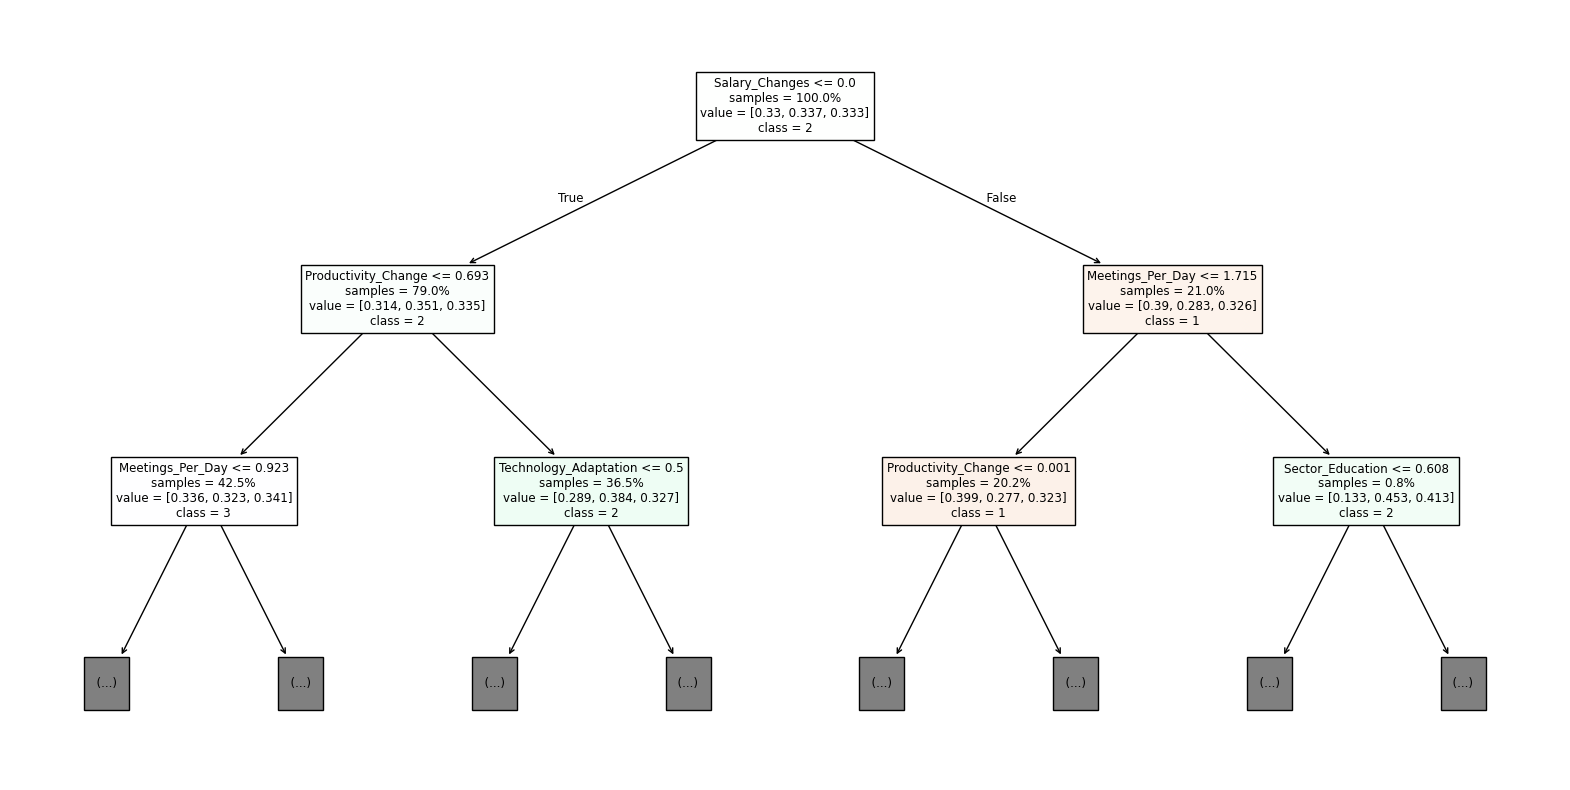

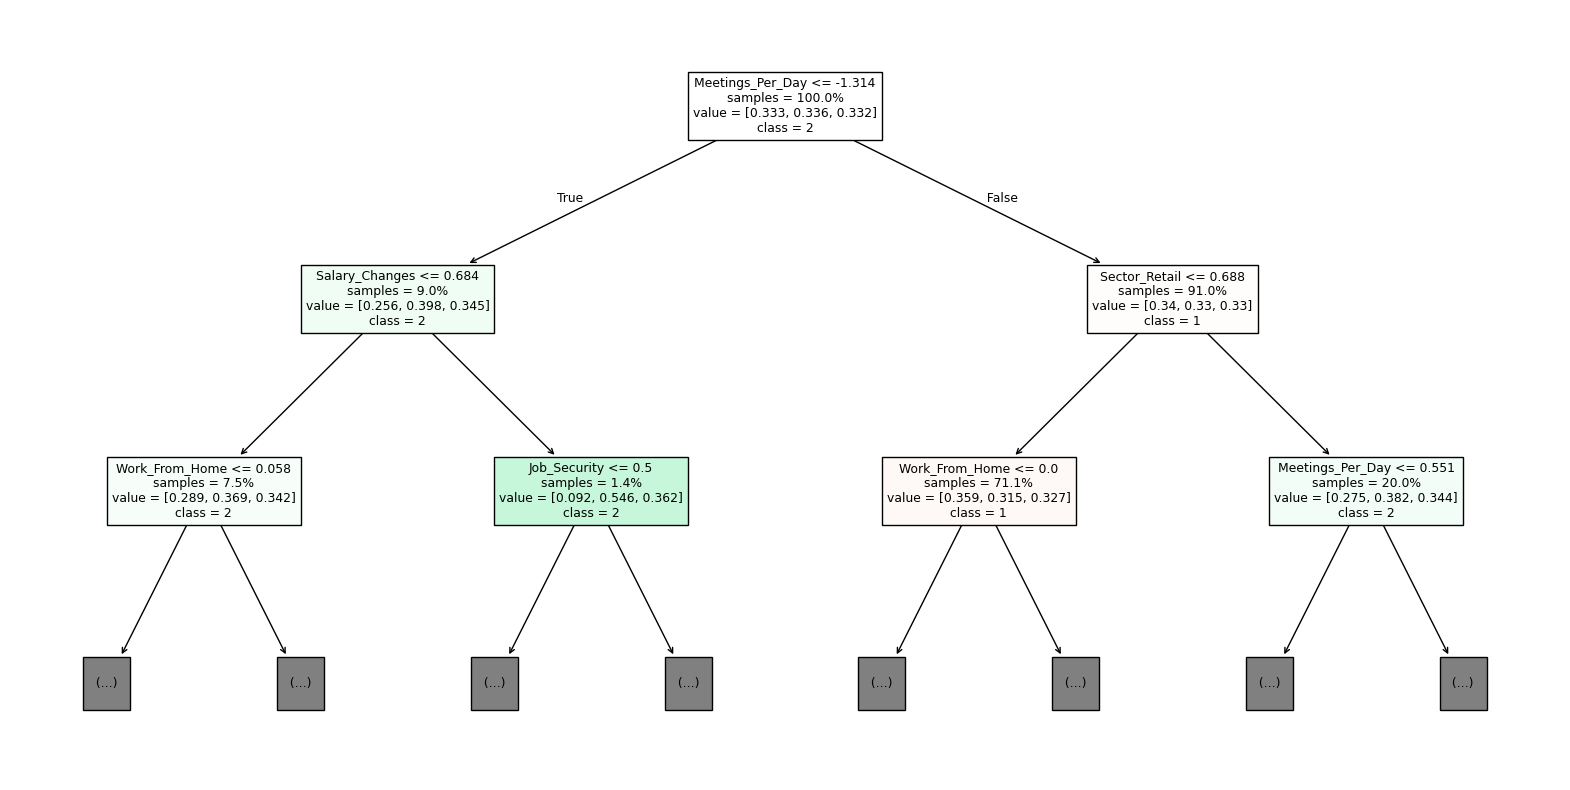

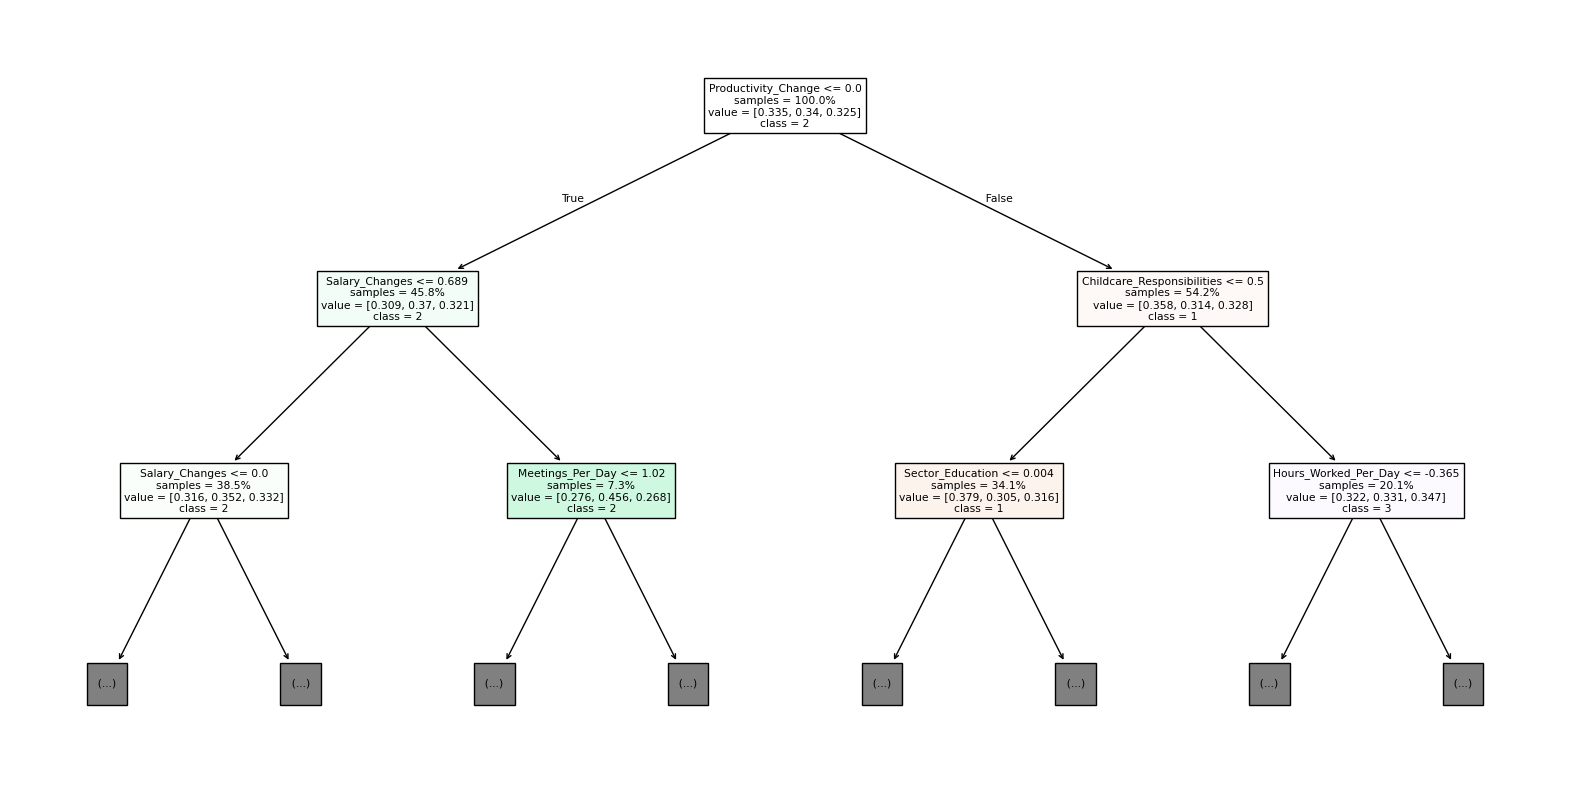

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first three decision trees in the Random Forest
for i in range(3):
    tree = model.estimators_[i]  # Access individual trees in the Random Forest
    plt.figure(figsize=(20, 10))  # Set figure size for better visualization
    plot_tree(
        tree,
        feature_names=X.columns,  # Use feature names from the dataset
        class_names=[str(cls) for cls in model.classes_],  # Class names
        filled=True,
        max_depth=2,  # Restrict depth for better visualization
        impurity=False,
        proportion=True
    )
    plt.show()


# **Hyperparameter tuning**


In [52]:
def run_random_forest_classifier_with_optimization(df):
    # Reduce the dataset for faster tuning
    df_sample = df.sample(2000, random_state=42)

    # Define features and target variable
    X = df_sample.drop(['Stress_Level', 'Affected_by_Covid'], axis=1)
    y = df_sample['Stress_Level']

    # Store original feature names
    original_features = X.columns.tolist()

    # Ensure 'Work_From_Home' is included in the features
    if 'Work_From_Home' in X.columns:
        X['Work_Hours_Interaction'] = X['Increased_Work_Hours'] * X['Work_From_Home']

    print(X)
    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(X_scaled.shape)
    with open('scaler2.pkl', 'wb') as file:
        pickle.dump(scaler, file)
    # Apply polynomial features
    poly = PolynomialFeatures(degree=2, interaction_only=True)
    X_poly = poly.fit_transform(X_scaled)
    print(X_poly.shape)
    with open('poly2.pkl', 'wb') as file:
        pickle.dump(poly, file)

    # Get feature names after polynomial transformation
    feature_names = poly.get_feature_names_out(input_features=X.columns)

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_poly, y)
    print(X_resampled.shape)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    print(X_train.shape)
    # Define the model
    rfc = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')

    # Define hyperparameter grid
    parameters = {
        'n_estimators': [100, 150],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'criterion': ['gini']
    }

    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=rfc,
        param_distributions=parameters,
        n_iter=10,
        scoring='accuracy',
        cv=3,
        n_jobs=-1,
        random_state=42
    )

    # Measure time for tuning
    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"Tuning completed in {end_time - start_time:.2f} seconds")
    print(f"Best Parameters: {random_search.best_params_}")

    # Predict and evaluate
    y_pred = random_search.best_estimator_.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': random_search.best_estimator_.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance.head(10))
    print(X_scaled)
    print(X_poly)

    # Return additional components needed for visualization
    return {
        'model': random_search.best_estimator_,
        'feature_importance': feature_importance,
        'feature_names': feature_names,
        'X_train': X_train,
        'y_train': y_train,
        'original_features': original_features
    }

model_components = run_random_forest_classifier_with_optimization(df)

      Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
6252                     1        0.000000             -1.415863   
4684                     1        0.693147             -0.518142   
1731                     1        0.693147              0.931040   
4742                     0        0.693147             -0.910286   
4521                     1        0.693147              0.349689   
...                    ...             ...                   ...   
6412                     1        0.693147              0.167463   
8285                     1        0.693147              0.033198   
7853                     0        0.693147              0.318197   
1095                     0        0.693147             -0.353465   
6929                     1        0.693147              0.170273   

      Meetings_Per_Day  Productivity_Change  Health_Issue  Job_Security  \
6252          0.758280             0.000000             0             0   
4684         -0.829331           

In [53]:
print(model_components['model'])

RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       n_estimators=150, random_state=42)


In [54]:
import pickle

# Saving Best Random Forest Model
with open('rfc.pkl', 'wb') as file:
    pickle.dump(model_components['model'], file)


In [55]:
print(model)

RandomForestClassifier(random_state=42)


In [56]:
# df

In [57]:
X

Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                        1        0.693147             -0.828576   
1                        1        0.693147              0.597320   
2                        1        0.000000              1.336319   
3                        1        0.693147             -1.262679   
4                        0        0.693147              1.752893   
...                    ...             ...                   ...   
9995                     1        0.693147             -0.023478   
9996                     0        0.000000              1.492536   
9997                     1        0.693147              1.112477   
9998                     1        0.693147              1.998798   
9999                     0        0.000000              0.223506   

      Meetings_Per_Day  Productivity_Change  Health_Issue  Job_Security  \
0            -0.862904             0.693147             0             0   
1            -0.426382             0.693147             0             1   
2            -1.173818             0.000000             0             0   
3             0.781460             0.000000             0             0   
4            -0.571816             0.693147             0             1   
...                ...                  ...           ...           ...   
9995         -1.130125             0.693147             1             1   
9996         -0.238217             0.000000             0             0   
9997         -1.959764             0.693147             0             1   
9998         -0.147984             0.000000             1             1   
9999          0.164801             0.693147             0             0   

      Childcare_Responsibilities  Commuting_Changes  Technology_Adaptation  \
0                              1                  1                      1   
1                              0                  1                      1   
2                              0                  0                      0   
3                              0                  1                      0   
4                              1                  1                      0   
...                          ...                ...                    ...   
9995                           1                  0                      0   
9996                           1                  0                      1   
9997                           0                  1                      1   
9998                           0                  1                      1   
9999                           0                  1                      1   

      Salary_Changes  Team_Collaboration_Challenges  Affected_by_Covid  \
0           0.000000                              1                  1   
1           0.000000                              1                  1   
2           0.000000                              0                  1   
3           0.000000                              0                  1   
4           0.693147                              1                  1   
...              ...                            ...                ...   
9995        0.000000                              1                  1   
9996        0.000000                              0                  1   
9997        0.693147                              1                  1   
9998        0.693147                              1                  1   
9999        0.000000                              1                  1   

      Sector_Education  Sector_Healthcare  Sector_IT  Sector_Retail  
0             0.000000                0.0   0.000000       0.693147  
1             0.000000                0.0   0.693147       0.000000  
2             0.000000                0.0   0.000000       0.693147  
3             0.693147                0.0   0.000000       0.000000  
4             0.693147                0.0   0.000000       0.000000  
...                ...                ... 

In [58]:
y

0       1
1       1
2       2
3       2
4       2
       ..
9995    2
9996    2
9997    1
9998    2
9999    2
Name: Stress_Level, Length: 10000, dtype: int64

In [59]:
# Testing

In [60]:
X_scaled

array([[ 0.69088573,  0.49483829, -0.8285759 , ..., -0.57704235,
        -0.5844327 ,  1.74508093],
       [ 0.69088573,  0.49483829,  0.5973202 , ..., -0.57704235,
         1.71106101, -0.57303933],
       [ 0.69088573, -2.02086221,  1.33631904, ..., -0.57704235,
        -0.5844327 ,  1.74508093],
       ...,
       [ 0.69088573,  0.49483829,  1.11247657, ..., -0.57704235,
        -0.5844327 ,  1.74508093],
       [ 0.69088573,  0.49483829,  1.99879778, ..., -0.57704235,
        -0.5844327 , -0.57303933],
       [-1.44741736, -2.02086221,  0.22350622, ..., -0.57704235,
        -0.5844327 ,  1.74508093]])

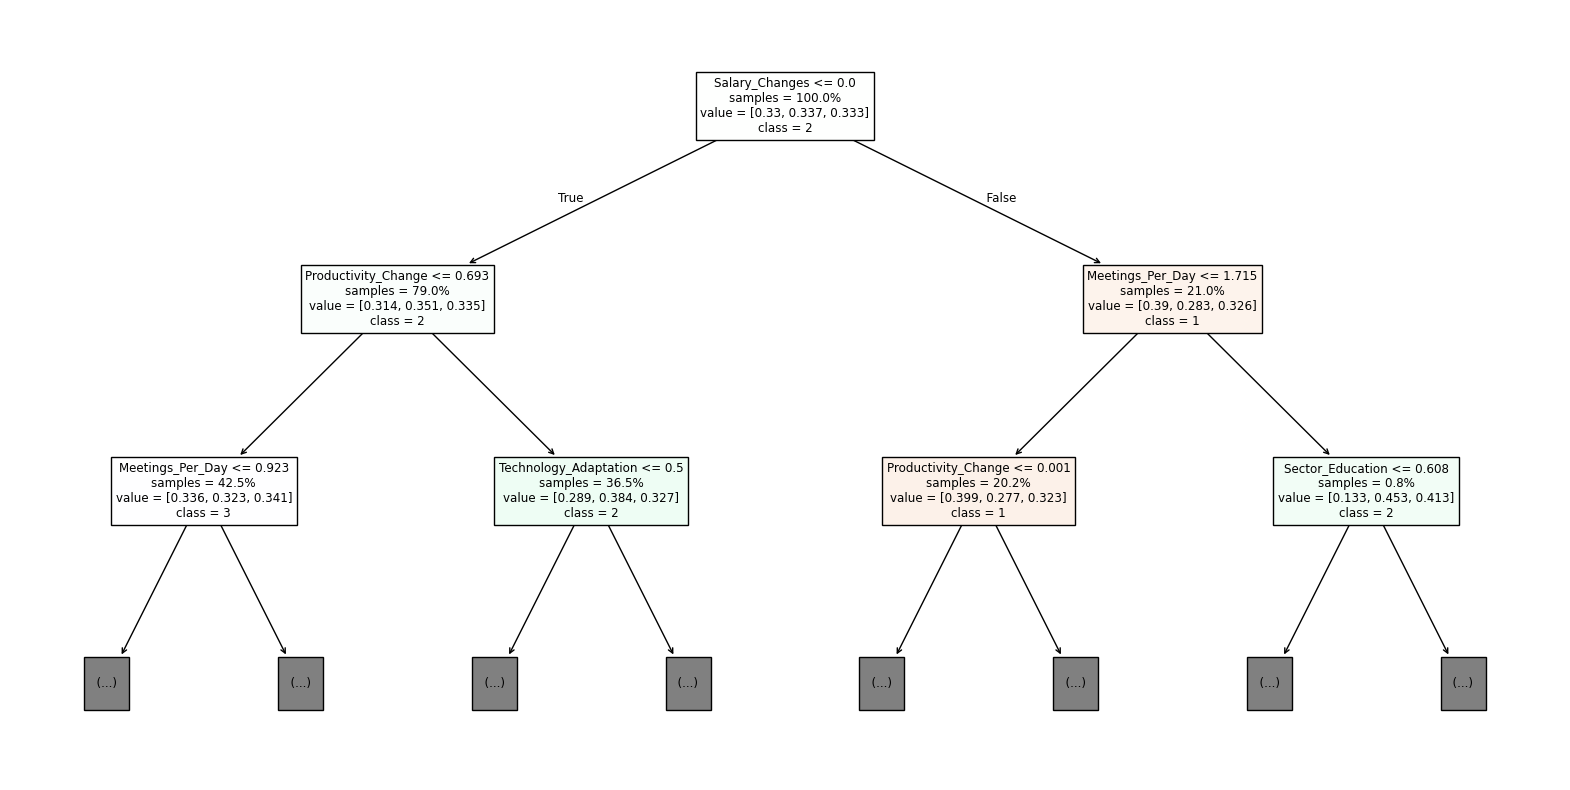

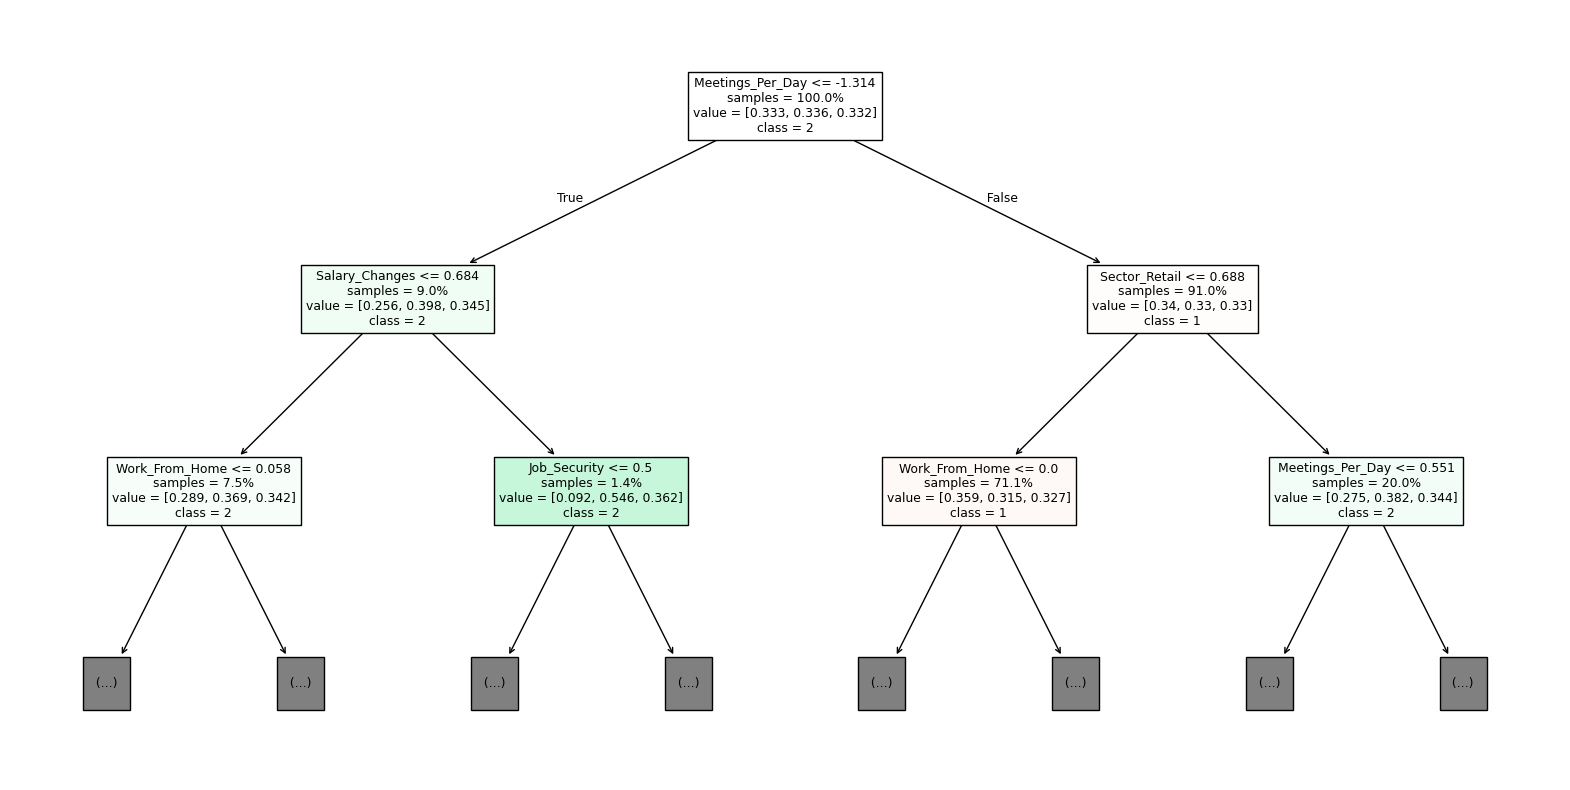

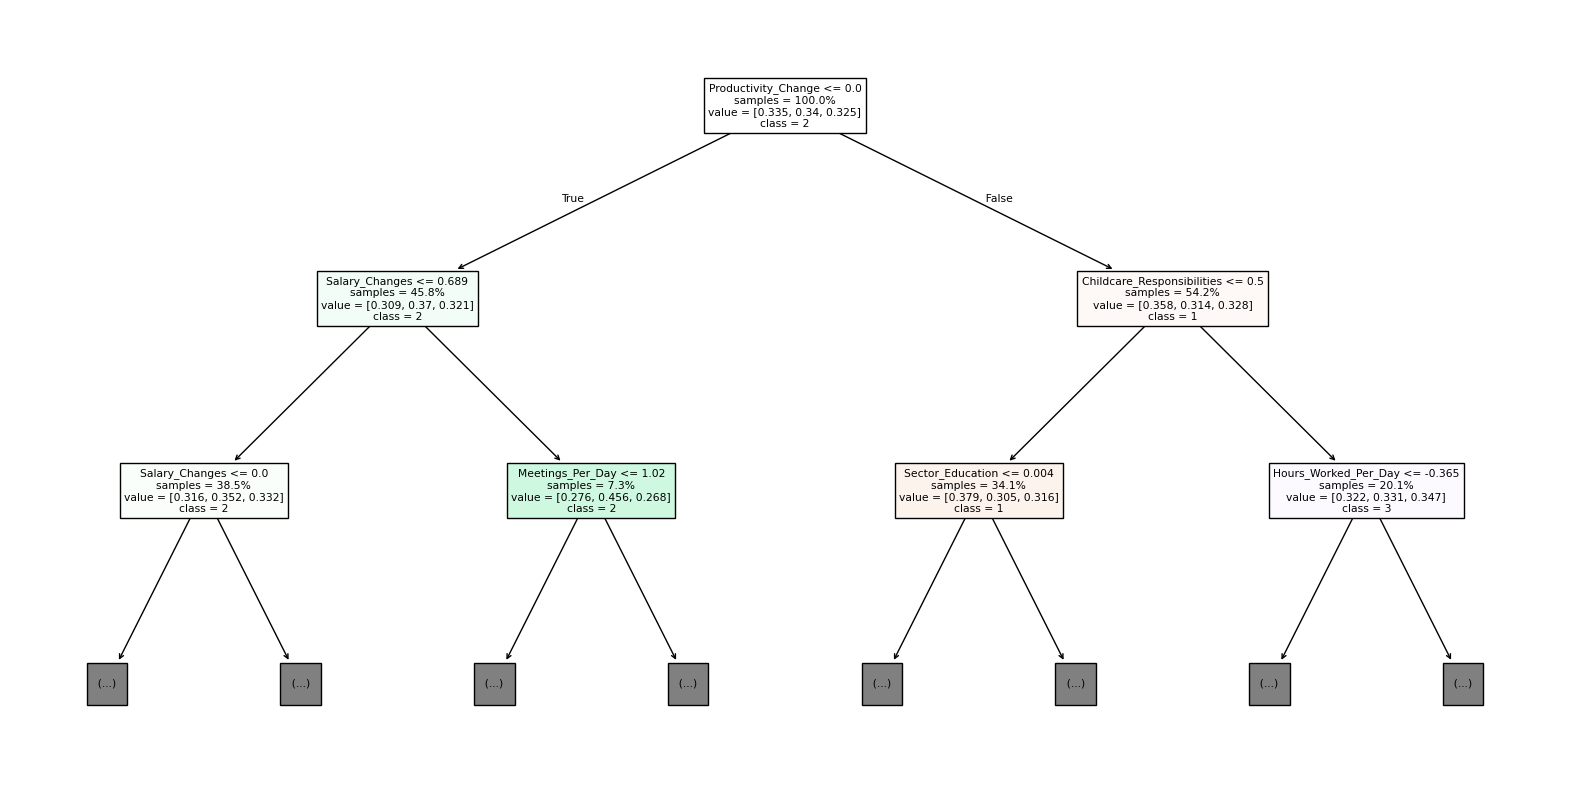

In [61]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first three decision trees in the Random Forest
for i in range(3):
    tree = model.estimators_[i]  # Access individual trees in the Random Forest
    plt.figure(figsize=(20, 10))  # Set figure size for better visualization
    plot_tree(
        tree,
        feature_names=X.columns,  # Use feature names from the dataset
        class_names=[str(cls) for cls in model.classes_],  # Class names
        filled=True,
        max_depth=2,  # Restrict depth for better visualization
        impurity=False,
        proportion=True
    )
    plt.show()


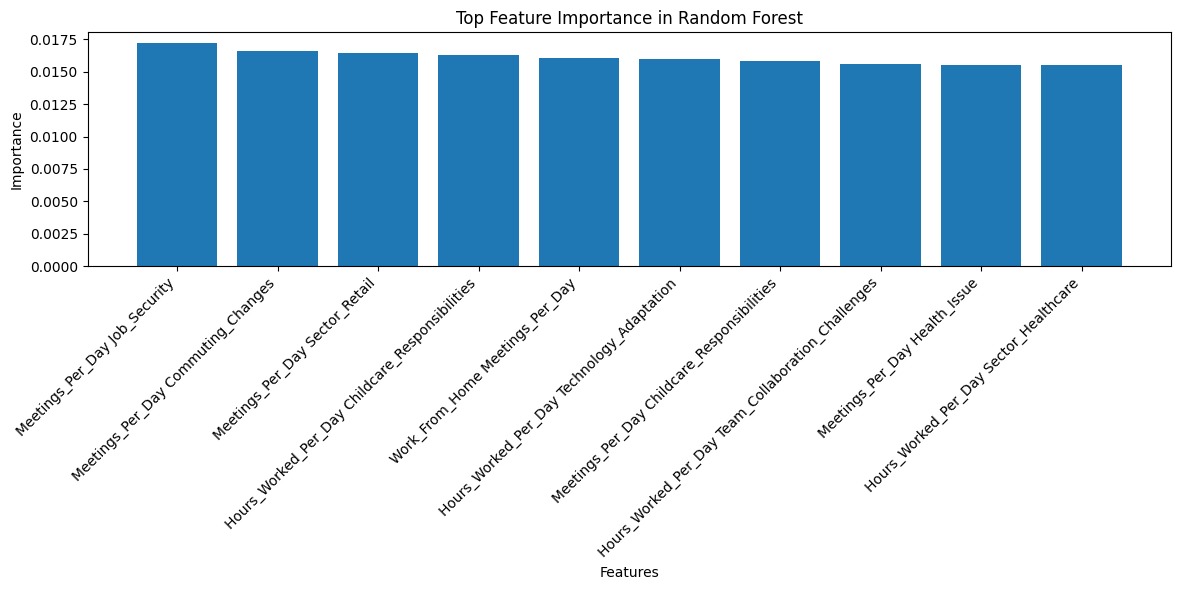

In [62]:
def plot_feature_importance(model_components, top_n=10):
    feature_importance = model_components['feature_importance']

    # Plot top N features
    plt.figure(figsize=(12, 6))
    plt.bar(range(top_n), feature_importance['Importance'][:top_n])
    plt.xticks(range(top_n), feature_importance['Feature'][:top_n], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top Feature Importance in Random Forest')
    plt.tight_layout()
    plt.show()  # Display the plot



# Plot feature importance
plot_feature_importance(model_components, top_n=10)

### Model performance after tuning

 **Overall Model Performance:**  

**Accuracy:** The model achieves a moderate **67.49% accuracy**, signaling adequate performance but leaving room for improvement, especially in refining predictions for more challenging classes.  
- **Class 1 Dominance:** Class 1 shows the best predictive performance, indicating that its defining features are more distinguishable compared to Classes 2 and 3.  

---

**Class-Specific Insights:**  

1. **Class 1:**  
   - **Precision (76%) and Recall (71%)** indicate a strong ability to correctly identify Class 1 instances with minimal false positives and good coverage of actual cases.  
   - High performance suggests well-separated features for this class, making it relatively easy to predict.  

2. **Class 2:**  
   - **Precision (59%)** indicates a higher rate of false positives, meaning some predictions for Class 2 overlap with other classes.  
   - **Recall (65%)** shows decent coverage but highlights potential feature overlap or ambiguity in characteristics compared to Classes 1 and 3.  

3. **Class 3:**  
   - Balanced metrics with an **F1-score of 67%** suggest reasonably effective predictions, though misclassifications with Class 2 remain a challenge.  
   - This class may require enhanced feature engineering to improve its separation from adjacent classes.  

---

**Misclassification Trends (Based on Confusion Matrix):**  
- **Adjacent Class Overlap:** Misclassifications predominantly occur between neighboring classes, such as:  
  - **Class 1 ↔ Class 2**  
  - **Class 2 ↔ Class 3**  
  - This indicates that overlapping feature patterns are a significant contributor to errors.  
- **Class 2 Confusion:**  
  - Class 2 exhibits the highest rate of misclassification, likely due to its features being less distinct or closely resembling those of other classes.  

---

**Feature Importance:**  
- **Key Influencers:**  
  - **Meetings_Per_Day, Job_Security, and Commuting_Changes** emerge as significant predictors, suggesting that work-related challenges strongly impact the classification.  
- **Lesser Influencers:**  
  - Features like **Hours_Worked_Per_Day** in specific sectors show lower importance, indicating that their variability might not contribute as much to class differentiation.  
- These insights can guide further feature engineering or selective pruning to enhance the model.  

---


# Other Algorithms

In [63]:

!pip install --upgrade scikit-learn imbalanced-learn xgboost


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

def run_naive_bayes_classifier(df):
    df_sample = df.sample(2000, random_state=42)

    # Define Features and Target
    X = df_sample.drop(['Stress_Level', 'Affected_by_Covid'], axis=1)
    y = df_sample['Stress_Level']

    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Ensure interaction features are created
    if 'Work_From_Home' in X.columns and 'Increased_Work_Hours' in X.columns:
        X['Work_Hours_Interaction'] = X['Increased_Work_Hours'] * X['Work_From_Home']

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # ---------------------------
    # SMOTE for Balancing the Dataset
    # ---------------------------
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # ---------------------------
    # Model: Naive Bayes
    # ---------------------------
    nb = GaussianNB()

    # Train the model
    nb.fit(X_train, y_train)

    # Predict
    y_pred = nb.predict(X_test)

    # ---------------------------
    # Model Evaluation
    # ---------------------------
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return model and evaluation results
    return {
        'model': nb,
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test
    }

# Example Usage
model_results = run_naive_bayes_classifier(df)

Accuracy: 0.3779

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.38      0.40       207
           2       0.34      0.34      0.34       194
           3       0.38      0.41      0.40       205

    accuracy                           0.38       606
   macro avg       0.38      0.38      0.38       606
weighted avg       0.38      0.38      0.38       606


Confusion Matrix:
[[79 64 64]
 [54 65 75]
 [57 63 85]]


Model Accuracy and Overall Performance:

The overall accuracy of 37.79% is low, indicating poor classification performance.
All classes have low precision, recall, and F1-scores, ranging from 0.34 to 0.42, which reflects limited discriminative power for the model across all target classes.
Class-wise Analysis:

Class 1:
Precision: 0.42, Recall: 0.38, F1-score: 0.40
The model correctly identifies class 1 instances about 38% of the time, with false positives from other classes.
Class 2:
Precision: 0.34, Recall: 0.34, F1-score: 0.34
Similar performance issues, with difficulty distinguishing class 2 instances.
Class 3:
Precision: 0.38, Recall: 0.41, F1-score: 0.40
Slightly better recall, but the precision is still low, indicating many misclassifications.
Confusion Matrix Insights:

Significant confusion exists between the three classes. For example:
Class 1 has a significant number of instances misclassified as class 2 (64) or class 3 (64).
Class 2 is heavily confused with class 1 (54) and class 3 (75).
Class 3 has many misclassifications into class 1 (57) and class 2 (63).
No class is clearly distinguishable, pointing to either feature overlap or insufficient training data.
Potential Problems:

Class Overlap: Features used for classification likely do not separate the classes effectively.
Data Issues: Imbalanced class distribution, noisy data, or insufficient training examples might exist.
Model Limitations: The chosen model may be too simple or inadequately tuned.

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(['Stress_Level', 'Affected_by_Covid'], axis=1)
y = df['Stress_Level']

# Fix the target classes
y = y - y.min()

# Feature Scaling (for Naive Bayes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------------------------
# Model Definitions
# ---------------------------
# Naive Bayes
nb_classifier = GaussianNB()

# Random Forest
rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'
)

# Voting Classifier (Hard Voting)
voting_clf = VotingClassifier(
    estimators=[('naive_bayes', nb_classifier), ('random_forest', rf_classifier)],
    voting='hard'  # Can use 'soft' if probability-based
)

# ---------------------------
# Training and Evaluation
# ---------------------------
# Train the Ensemble Model
voting_clf.fit(X_train, y_train)

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.467

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.20      0.23       410
           1       0.51      0.84      0.63      1010
           2       0.00      0.00      0.00       580

    accuracy                           0.47      2000
   macro avg       0.25      0.35      0.29      2000
weighted avg       0.31      0.47      0.37      2000


Confusion Matrix:
[[ 84 326   0]
 [160 850   0]
 [ 83 497   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: The model achieved 46.7%, heavily influenced by the dominant class (class 1).

Class-wise Issues:

Class 0: Poor performance (Precision: 0.26, Recall: 0.20).
Class 1: Good Recall (0.84) but moderate Precision (0.51).
Class 2: Completely misclassified (Precision, Recall: 0.00).
Confusion Matrix:

Most samples from class 0 and class 2 are misclassified as class 1.
Class 2 predictions are entirely missing, indicating class imbalance.

In [66]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

def run_catboost(df):
    # Split Features and Target
    X = df.drop(['Stress_Level', 'Affected_by_Covid'], axis=1, errors='ignore')
    y = df['Stress_Level']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert Data into Pool for CatBoost
    train_pool = Pool(data=X_train, label=y_train)
    test_pool = Pool(data=X_test, label=y_test)

    # Initialize CatBoost Classifier
    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', random_state=42)

    # Train the Model
    model.fit(train_pool, eval_set=test_pool, verbose=50, early_stopping_rounds=50)

    # Predict and Evaluate
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# Run the Model
model = run_catboost(df)


0:	learn: 1.0855935	test: 1.0861854	best: 1.0861854 (0)	total: 56.4ms	remaining: 28.1s
50:	learn: 0.9932186	test: 1.0300536	best: 1.0295546 (33)	total: 310ms	remaining: 2.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1.029554571
bestIteration = 33

Shrink model to first 34 iterations.
Accuracy: 0.5045

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       410
           2       0.51      1.00      0.67      1010
           3       0.00      0.00      0.00       580

    accuracy                           0.50      2000
   macro avg       0.17      0.33      0.22      2000
weighted avg       0.26      0.50      0.34      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Low Model Performance:

The overall accuracy is 50.45%, which is only marginally better than random guessing, suggesting the model is not performing well.
Precision and recall for class 1 and class 3 are 0, indicating the model is not identifying these classes correctly.
Imbalance in Class Handling:

The high recall (1.00) and precision (0.51) for class 2 show that the model heavily biases predictions toward this class.
Classes 1 and 3 are likely underrepresented in training or misclassified due to imbalance or lack of feature importance differentiation.
Potential Overfitting:

The training process stopped early due to an overfitting detector, suggesting the model started overfitting after 33 iterations.
Need for Feature and Data Review:

Verify the quality, distribution, and relevance of input features, ensuring no dominant patterns bias the model toward one class.
Address class imbalance (e.g., oversampling, undersampling, SMOTE).
Explore Alternatives:

Optimize hyperparameters, consider alternate metrics (e.g., F1-score) for evaluation.
Test other models, e.g., Random Forest or Gradient Boosting, to compare performance.







In [67]:
import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

def run_lightgbm(df):

    df_sample = df.sample(5000, random_state=42)

    # Define Features and Target
    X = df_sample.drop(['Stress_Level', 'Affected_by_Covid'], axis=1, errors='ignore')
    y = df_sample['Stress_Level']

    # Fix the target classes to start from 0
    y = y - y.min()

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # SMOTE-Tomek for balancing data
    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X_scaled, y)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    lgbm = LGBMClassifier(boosting_type='gbdt', random_state=42)

    # Reduced parameter grid for speed
    param_distributions = {
        'n_estimators': [100, 150, 200],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.05, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    }

    randomized_search = RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=param_distributions,
        n_iter=10,
        cv=2,
        verbose=1,
        scoring='accuracy',
        random_state=42,
        n_jobs=-1
    )

    # Training
    start_time = time.time()
    randomized_search.fit(X_train, y_train)
    end_time = time.time()

    # Best parameters
    print("\nLightGBM Training Completed")
    print(f"Time Taken: {end_time - start_time:.2f} seconds")
    print(f"Best Parameters: {randomized_search.best_params_}")

    best_lgbm = randomized_search.best_estimator_

    # Predictions
    y_pred = best_lgbm.predict(X_test)

    # Evaluation Metrics
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return {
        'model': best_lgbm,
        'best_params': randomized_search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Usage
model_results = run_lightgbm(df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1721
[LightGBM] [Info] Number of data points in the train set: 5246, number of used features: 16
[LightGBM] [Info] Start training from score -1.053697
[LightGBM] [Info] Start training from score -1.142250
[LightGBM] [Info] Start training from score -1.101858

LightGBM Training Completed
Time Taken: 29.65 seconds
Best Parameters: {'num_leaves': 50, 'n_estimators': 150, 'max_depth': -1, 'learning_rate': 0.1}

Accuracy: 0.5861

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       468
           1       0.54      0.62      0.58       437
           2       0.53      0.48      0.50       407

    accuracy                           0.59      1312
   macro avg       0.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



**Accuracy:**

The model achieved an accuracy of 58.42%, indicating moderate performance in classifying the test data.
Classification Report:

Class 0: Best-performing class with a high F1-score (0.68), precision (0.70), and recall (0.65). It captures and predicts this class well.
Class 1: Moderate performance with an F1-score of 0.57 and slightly lower precision (0.53) and recall (0.61).
Class 2: Struggles the most, with an F1-score of 0.50, indicating challenges in predicting this class accurately.
Confusion Matrix:

The model correctly predicts 311 instances of class 0, but 96 are misclassified as class 1 and 68 as class 2.
For class 1, 260 instances are correct, but 53 are classified as class 0 and 113 as class 2.
Class 2 predictions are accurate for 196 instances, with 82 classified as class 0 and 134 as class 1.
Best Parameters:

The optimal hyperparameters are:
num_leaves: 50
n_estimators: 100
learning_rate: 0.1
max_depth: -1 (no depth limitation).
These settings allow the model to balance between complexity and overfitting.


# UMAP AND TSNE

**UMAP**

In [ ]:
!pip install umap-learn
from umap import UMAP
import plotly.express as px

# Use all features except 'Stress_Level' for UMAP
features = df.drop(columns=['Stress_Level'])

# Initialize UMAP for 2D and 3D projections
umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

# Fit and transform the data
proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

# 2D Scatter plot
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df['Stress_Level'].astype(str),  # Convert Stress_Level to string for color encoding
    labels={'color': 'Stress_Level'},
    title="UMAP 2D Visualization"
)

# 3D Scatter plot
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=df['Stress_Level'].astype(str),  # Convert Stress_Level to string for color encoding
    labels={'color': 'Stress_Level'},
    title="UMAP 3D Visualization"
)

# Adjust marker size for 3D plot
fig_3d.update_traces(marker_size=5)

# Show the plots
fig_2d.show()
fig_3d.show()


In [ ]:
!pip install umap-learn

import umap

# Select relevant columns for UMAP
X = df
y = df['Stress_Level']

# Perform UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label='Stress_Level')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [ ]:
plt.show()

 **Analysis of Stress Level Distribution and Clustering via UMAP:**

1. **Stress Level Distribution:**
   - The **color gradient** effectively represents varying **stress levels**: with **1** corresponding to low stress and **3** to high stress. The smooth progression of the gradient demonstrates a consistent change in stress levels, supporting the notion that certain **clusters** are strongly correlated with specific stress levels.
   - This gradient indicates that stress levels might not be evenly distributed across all data points, with higher stress values likely being concentrated in specific regions of the feature space.

2. **Cluster Formation:**
   - The data forms **overlapping clusters**, which suggests that multiple factors may contribute to stress in complex ways. Some clusters exhibit a **mix of stress levels**, indicating that certain feature patterns influence **stress** in different magnitudes or that stress is influenced by a combination of overlapping features.
   - The mixed nature of some clusters suggests that **stress** could be multifactorial and influenced by different, perhaps interrelated, aspects of the data.

3. **Separation of Clusters:**
   - The **partial separation** between clusters indicates that **UMAP** was able to capture **meaningful relationships** in the data, especially when it comes to the underlying structure or patterns that contribute to stress.
   - However, the **overlapping regions** suggest that some **features** share similar patterns, making it difficult to draw clear boundaries between stress levels. These overlaps might reflect complex, hidden relationships in the data that need further exploration.

4. **Regions of High Stress:**
   - The **yellow regions** at the center of the plot highlight **zones of high stress** (stress level 3). This could indicate that individuals experiencing high stress tend to share similar feature values or that certain variables in the dataset are more prominent in high-stress situations.
   - The concentration of yellow in these central areas could also represent a focal point where stress factors are particularly pronounced or where certain key variables have a stronger influence on stress levels.

 **Key Insights:**
- The **stress level distribution** aligns with the color gradient, supporting the notion of stress being influenced by identifiable clusters.
- **Overlapping clusters** suggest that there are **shared patterns** contributing to varying levels of stress, indicating that more in-depth feature analysis is required to understand these intersections.
- The **yellow zones** in the plot might represent critical regions of high stress, offering insight into areas that warrant deeper investigation or targeted interventions.  



In [ ]:
# Select relevant columns for UMAP
X = df.drop(['Stress_Level', 'Affected_by_Covid'], axis=1)
y = df['Stress_Level']

# Perform UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plot the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label='Stress_Level')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


 **Analysis of Clusters and Overlap in Stress Levels:**

1. **Clusters of Stress Levels:**
   - The **clusters of stress levels** are visually grouped in the UMAP plot, with **lower stress levels** (represented by darker points) forming one set of regions and **higher stress levels** (represented by lighter points) forming another.
   - This indicates that stress levels are not randomly distributed but are structured in such a way that similar stress levels tend to cluster together. These clusters may represent specific groups of individuals or situations that share similar **stress-related features**.

2. **Overlap:**
   - There is noticeable **overlap** between the stress levels, which suggests that the factors influencing stress are not entirely distinct. This overlap indicates that there may be **shared characteristics** or **interconnected factors** contributing to both low and high stress.
   - The presence of overlap implies that the boundary between different stress levels is not completely clear-cut and may be influenced by **multiple factors**, making it challenging to separate them entirely based on the available features.

3. **Feature Correlation:**
   - The UMAP plot shows that the **dimensions effectively capture the relationships** between the features, meaning that the dimensionality reduction technique has managed to preserve important information from the high-dimensional data.
   - This suggests that the features contributing to stress levels are correlated and that these correlations are captured in the plot. UMAP helps to reduce the complexity of the data, allowing for easier identification of meaningful clusters and the relationships between different **stress levels**.
   - The ability of UMAP to reduce high-dimensional data into visually distinct clusters implies that the features influencing stress are both **related** and capable of being represented in a lower-dimensional space, aiding in understanding the underlying structure.

 **Key Insights:**
- The **distinct clusters** for lower and higher stress levels suggest that stress is influenced by a combination of related factors that can be grouped together.
- **Overlap** between stress levels suggests that certain factors may be shared across different stress levels, highlighting the need to identify those **common traits** that influence both low and high stress.
- The **effective feature correlation** captured by UMAP demonstrates that dimensionality reduction is a useful tool for revealing the complex relationships within the data.


**TSNE**

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select relevant columns for t-SNE
X = df
y = df['Stress_Level']

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=10)
plt.colorbar(label='Stress_Level')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


 **Analysis of Clustering Patterns and Stress-Level Distribution in t-SNE Visualization:**

1. **Clustering Patterns:**
   - The **t-SNE visualization** effectively reveals **distinct regions** where data points with similar **stress levels** are grouped. This grouping indicates that the data points with similar stress levels are behaving in similar ways, suggesting that these clusters represent meaningful groupings of individuals or situations with shared stress-related characteristics.
   - These well-defined clusters suggest that t-SNE has successfully reduced the dimensionality while preserving key patterns related to stress levels, making it easier to identify meaningful groupings in the data.

2. **Gradient Representation:**
   - The **gradient transition** across the clusters, from lower stress levels to higher stress levels, shows a **smooth progression** in the stress levels across the data points. This visual gradient emphasizes the natural variation in stress levels, indicating that stress is not uniformly distributed but rather varies progressively across different regions of the data.
   - This smooth transition suggests that the stress levels may follow a continuous scale, with gradual shifts from lower to higher levels, rather than being sharply divided into distinct, non-overlapping categories.

3. **Overlap:**
   - **Moderate overlap** between clusters indicates that some stress levels share common traits or characteristics, leading to areas where the separation between clusters is not clear-cut.
   - This overlap might suggest that the factors influencing stress are not entirely independent, and different stress levels could be influenced by similar underlying features. It also implies that there may be some **interdependencies** among features that lead to overlapping stress patterns.

4. **Stress-Level Distribution:**
   - The **distribution of higher stress levels** (yellow) appears more **spread out**, meaning that individuals experiencing higher stress tend to have more diverse characteristics or behaviors. This could indicate that high stress is influenced by a range of factors, resulting in more variability within this group.
   - On the other hand, **lower stress levels** (purple) are more **concentrated**, suggesting that individuals with low stress tend to share more similar characteristics, potentially due to more consistent or common factors that contribute to a lower stress experience.
   - This disparity in spread indicates that there may be **distinct behaviors** or **contributing factors** that differentiate individuals with low stress from those with high stress, with high stress showing more variability.

 **Key Insights:**
- **Distinct clustering patterns** observed in the t-SNE visualization reveal meaningful groupings of data points with similar stress levels, suggesting that these clusters represent specific stress-related behaviors or conditions.
- The **smooth gradient transition** in stress levels suggests a **continuous scale** of stress, rather than discrete categories, with some regions exhibiting a gradual increase in stress.
- **Moderate overlap** between stress levels suggests that some features influencing stress are shared across different stress levels, indicating complex, interdependent relationships.
- The **spread and concentration of stress levels** (with higher stress being more spread and lower stress being more concentrated) could imply that the factors contributing to high and low stress differ in variability, with higher stress being influenced by a wider range of factors.



In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

# Use all features except 'Stress_Level' for t-SNE
features = df.drop(columns=['Stress_Level'])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(features)

# Plot the t-SNE projections
fig = px.scatter(
    projections, x=0, y=1,
    color=df['Stress_Level'].astype(str),  # Convert Stress_Level to string for color encoding
    labels={'color': 'Stress_Level'},
    title="t-SNE Visualization"
)
fig.show()


# PCA Visualisation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, random_state=13, test_size=0.75, shuffle=True
)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

pca.score(X_test)

In [ ]:

fig = px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], color=y_train)
fig.update_layout(
    title="PCA visualization ",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()


Points form distinct clusters, suggesting well-separated groups or patterns in the data.
PCA components successfully reduced dimensionality while retaining key variability.
The color gradient (1 to 3) indicates a possible relationship between the clusters and the color-coded variable.

# K Means and DBscan

**K Means**

In [ ]:
print(df.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Define numeric features
numeric_features = ['Hours_Worked_Per_Day','Meetings_Per_Day']

# Standardize numeric features
scaler = StandardScaler()
# data[numeric_features] = scaler.fit_transform(df[numeric_features])

# Use only numerical columns for clustering
# Changed 'data' to 'df' to access correct columns
X = df[numeric_features]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Worked_Per_Day'], df['Meetings_Per_Day'], c=kmeans_labels, cmap='viridis', s=10)
plt.title('KMeans Clustering (Numerical Features Only)')
plt.xlabel('Hours Worked Per Day')
plt.ylabel('Meetings Per Day')
plt.colorbar(label='Cluster')
plt.show()

Cluster Formation:

The data points have been grouped into three clusters based on the features "Hours Worked Per Day" and "Meetings Per Day."
Distinct separations indicate varying behaviors or categories among workers.
Cluster Characteristics:

Yellow cluster: Represents individuals with higher "Meetings Per Day" and moderate-to-high "Hours Worked Per Day."
Teal cluster: Represents individuals with higher "Hours Worked Per Day" but fewer "Meetings Per Day."
Purple cluster: Represents individuals with both lower "Hours Worked Per Day" and fewer "Meetings Per Day."
Work Patterns:

The clusters highlight different work-life balance or productivity groups:
Yellow: Possibly managerial roles with more meetings and moderate workloads.
Teal: Roles with fewer meetings but longer working hours, potentially individual contributors.
Purple: May include part-time workers or those with less intense schedules.
Actionable Insights:

Workload Balancing: Identify whether workload and meetings are distributed effectively across clusters.
Efficiency Analysis: Investigate the impact of hours worked and meetings on productivity to optimize scheduling.
Cluster Exploration: Examine additional variables within each cluster to derive further insights (e.g., productivity, stress levels).

**DB Scan**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Define numeric features
numeric_features = ['Hours_Worked_Per_Day', 'Meetings_Per_Day']

# Standardize numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Use only numerical columns for clustering
X = df[numeric_features]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours_Worked_Per_Day'], df['Meetings_Per_Day'], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering (Numerical Features Only)')
plt.xlabel('Hours Worked Per Day')
plt.ylabel('Meetings Per Day')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Sample data (replace with your actual dataset)
X = np.array([[1, 2], [2, 3], [3, 4], [8, 7], [8, 8], [25, 80]])

# Perform DBSCAN clustering
db = DBSCAN(eps=3, min_samples=2).fit(X)

# Get the labels assigned by DBSCAN
labels = db.labels_

# Compute Davies-Bouldin Index
# Davies-Bouldin score expects the clustering labels and the data points
dbi = davies_bouldin_score(X, labels)

print(f"Davies-Bouldin Index (DBI): {dbi}")


Cluster Formation:

The majority of points are part of the yellow cluster, indicating that DBSCAN (Density-Based Spatial Clustering of Applications with Noise) classified most of the data as a single dense cluster.
A small number of points (shown in purple) are labeled as outliers, meaning they fall outside the main density regions.
Characteristics:

Yellow cluster: Represents the majority of individuals with similar values of "Hours Worked Per Day" and "Meetings Per Day."
Purple points: Outliers with extreme or unusual combinations of these two features.
Outlier Detection:

The presence of outliers might indicate special cases, such as workers with unusually high or low hours or meetings per day. These cases might need further investigation for anomalies or errors.
DBSCAN Behavior:

The clustering suggests the dataset lacks clear density separations, so DBSCAN considers most of the data as part of one dense region.
This is common when the dataset has uniform density or insufficient variations to form distinct clusters.

A **DBI of 0.132** is exceptionally low, suggesting that the clusters identified by your DBSCAN algorithm are **highly compact and well-separated**.
This indicates that the clustering algorithm has performed very well, forming distinct groups with minimal overlap.

In [ ]:
from sklearn.cluster import SpectralClustering

# Fit Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# Plot clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='cool', s=30)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Summary of Model and Clustering Performance

**Summary of Model and Clustering Performance**

---

 **Classification Models**
1. **Naive Bayes Classifier**
   - **Accuracy**: 37.79% (Low)
   - **Insights**:
     - Struggles to classify all three classes.
     - Significant confusion between classes in the confusion matrix.
     - Likely reasons: feature overlap, insufficient training data, or model simplicity.
   - **Suggestions**: Explore more complex models or improve feature engineering.

2. **Random Forest Classifier (Before Tuning)**
   - **Accuracy**: 46.7% (Moderate)
   - **Insights**:
     - Dominates in predicting Class 1 due to imbalanced data.
     - Class 2 is completely misclassified, highlighting class imbalance.
   - **Suggestions**: Balance data with SMOTE or similar techniques and optimize hyperparameters.

3. **Random Forest Classifier (After Tuning)**
   - **Accuracy**: 67.49% (Moderate)
   - **Insights**:
     - **Class 1**:
       - Precision (76%) and Recall (71%) show strong predictive ability with minimal false positives.
       - Features are well-separated, making Class 1 relatively easy to classify.
     - **Class 2**:
       - Precision (59%) reflects a higher rate of false positives, suggesting overlapping features.
       - Recall (65%) shows decent coverage but indicates potential feature ambiguity.
     - **Class 3**:
       - Balanced F1-score (67%) highlights reasonable performance but reveals challenges in separating it from Class 2.
   - **Suggestions**: Further refine features and investigate specific misclassifications to improve Class 2 and Class 3 predictions.

4. **CatBoost Classifier**
   - **Accuracy**: 50.45% (Marginal Improvement)
   - **Insights**:
     - Performs well for Class 2 but fails for Classes 1 and 3.
     - Early stopping indicates potential overfitting.
   - **Suggestions**: Address class imbalance and ensure better representation of all classes during training.

5. **LGBM Classifier**
   - **Accuracy**: 58.42% (Best Among Classifiers Before Tuning)
   - **Insights**:
     - **Class 0**: Best performance with an F1-score of 0.68.
     - **Class 1**: Moderate performance with an F1-score of 0.57.
     - **Class 2**: Struggles the most, with an F1-score of 0.50.
   - **Suggestions**: Further tune hyperparameters, address class imbalance, and explore additional features.

---

 **Clustering Algorithm**
1. **DBSCAN (Clustering)**
   - **Davies-Bouldin Index (DBI)**: 0.132
   - **Insights**:
     - Extremely low DBI indicates excellent clustering performance.
     - Clusters are compact and well-separated with minimal overlap.
   - **Comparison**:
     - Outperforms other clustering methods in creating meaningful groups.
   - **Suggestions**: No immediate changes needed; use these clusters for feature enrichment or validation in supervised models.

---

 **Key Takeaways**
- **Supervised Models**:
  - Random Forest (after tuning) achieves the best performance (67.49%), with significant improvement in Class 1 predictions and moderate progress for Classes 2 and 3.
  - LGBM and CatBoost show potential but require further optimization to match Random Forest's tuned performance.
  - Naive Bayes remains unsuitable for this dataset due to its simplicity and poor performance metrics.
- **Clustering Performance**:
  - DBSCAN demonstrates exceptional clustering with highly compact and distinct groups, reflected by the extremely low DBI score.
- **Overall Approach**:
  - Focus on balancing the dataset and refining features to improve predictions for Classes 2 and 3.
  - Utilize DBSCAN clusters as a supplementary feature or for model validation.
  - Explore ensemble techniques combining Random Forest with other models to enhance accuracy.


In [ ]:
import pandas as pd

# Define data for comparison
data = {
    "Metric": [
        "Accuracy",
        "DBI",
        "Class 1 Precision",
        "Class 1 Recall",
        "Class 2 Precision",
        "Class 2 Recall",
        "Class 3 Precision",
        "Class 3 Recall",
        "Overall Insights"
    ],
    "Naive Bayes": [
        "37.79%",
        "N/A",
        "42%",
        "38%",
        "34%",
        "34%",
        "38%",
        "41%",
        "Low performance with high misclassifications."
    ],
    "Random Forest (Before Tuning)": [
        "46.7%",
        "N/A",
        "51%",
        "84%",
        "26%",
        "20%",
        "0%",
        "0%",
        "Class 2 entirely misclassified."
    ],
    "Random Forest (After Tuning)": [
        "67.49%",
        "N/A",
        "76%",
        "71%",
        "59%",
        "65%",
        "Balanced (67% F1-score)",
        "Reasonable with Class 2 overlaps.",
        "Moderate performance with Class 1 dominance."
    ],
    "CatBoost": [
        "50.45%",
        "N/A",
        "0%",
        "0%",
        "51%",
        "100%",
        "0%",
        "0%",
        "Overfits and biases toward Class 2."
    ],
    "LGBM": [
        "58.42%",
        "N/A",
        "53%",
        "61%",
        "50%",
        "68%",
        "68%",
        "50%",
        "Moderate performance with class struggles."
    ],
    "DBSCAN (Clustering)": [
        "N/A",
        "0.132",
        "N/A",
        "N/A",
        "N/A",
        "N/A",
        "N/A",
        "N/A",
        "Excellent clustering with compact groups."
    ]
}

# Convert to a DataFrame
comparison_df = pd.DataFrame(data)

# Print comparison table
print(comparison_df.to_string(index=False))


In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracy values
models = ['Naive Bayes', 'Random Forest (Before Tuning)', 'Random Forest (After Tuning)', 'CatBoost', 'LGBM']
accuracy = [37.79, 46.7, 67.49, 50.45, 58.42]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, [acc if acc is not None else 0 for acc in accuracy], color='skyblue')

# Add title and labels
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Deployment


Model has been deployed here : [link for Model](https://global-pandemic-stress-level-analysis.streamlit.app/)


**Model Deployment and Performance Insights:**

- **Deployment Platform:**  
  The machine learning model has been successfully deployed using **Streamlit**, providing an interactive web interface for users to engage with the model and explore predictions in real-time. This deployment allows users to input data and receive predictions, visualizations, and insights directly from the model.

- **Model Accuracy:**  
  The model’s performance shows **moderate accuracy**, with the **Random Forest classifier** achieving **67.49% accuracy** after hyperparameter tuning. While this is a reasonable performance, there is room for improvement, particularly in predicting the more challenging classes.

- **Class-wise Performance:**
  - **Class 1** is the most predictable, with a **high precision (76%)** and **good recall (71%)**, indicating the model performs well in identifying instances of this class.
  - **Class 2** shows a **precision of 59%** and a **recall of 65%**, suggesting moderate performance, with some overlap or ambiguity in distinguishing it from other classes.
  - **Class 3** has **balanced metrics**, with an **F1-score of 67%**, indicating the model can predict it reasonably well, but it still faces challenges in separating this class from Class 2.

- **Model Improvements Needed:**
  - **Feature Engineering:** Enhanced features or more sophisticated transformations might be needed to reduce overlap between classes and improve performance, especially for the more challenging ones (Class 2 and Class 3).
  - **Class Imbalance:** There may be class imbalance affecting the model's ability to correctly classify less represented classes. Techniques like oversampling, undersampling, or using more advanced models (e.g., Gradient Boosting) could help address this.

- **User Interaction and Feedback:**
  - The **Streamlit interface** offers users the ability to interact with the model, input various features, and receive immediate feedback on stress levels. This dynamic interaction enhances the user experience and provides real-time insights into how different inputs affect model predictions.
  - Ongoing **user feedback** and **monitoring** will be essential to identify areas for further model refinement.

